**Regreesion**

**ECG Dataset**

In [5]:
import numpy as np
import pandas as pd 
df = pd.read_excel("C:/Users/ISD/Python_ali/ANNKNT/regression/ECG Datasets.xlsx")
data_E = df.to_numpy()

**Preparing Dataset**

In [7]:
data = data_E
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, clear_output

def createTimeSeries(data):
    tw = 8  #window
    l = data.shape[0] - tw -1
    time_series_array = np.zeros((l, tw-2))

    # Populate the time series array
    for i in range(time_series_array.shape[0]):
      for j in range(6):
        if j!=5:
          time_series_array[i, j] = data[i+j]
        elif j==5:
           time_series_array[i, j] = data[i+j+2]
    return  time_series_array


data = createTimeSeries(data)

def normalizeData(data):
  for ii in range(6):
      data[:, ii] = (data[:, ii] - np.min(data[:, ii])) /(np.max(data[:, ii]) - np.min(data[:, ii]))
  return data
data = normalizeData(data)
data[0, :]

C:\Users\ISD\AppData\Local\Temp\ipykernel_8972\936863721.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j]
C:\Users\ISD\AppData\Local\Temp\ipykernel_8972\936863721.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j+2]


array([0.93855932, 0.94597458, 0.94915254, 0.95444915, 0.95550847,
       0.97033898])

**Initialize Convetional MLP**

In [9]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n0, n1, n2, n3, n4 = 5, 80, 30, 10, 1
eta = 0.001
epoch = 60

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1


#layer 1 information
np.random.seed(42)
w1 = np.random.randn(n1, n0)
bi1 = np.random.randn(n1)
net1 = np.zeros(n1)
o1 = np.zeros(n1)


#layer 2 information
w2 = np.random.randn(n2, n1)
bi2 = np.random.randn(n2)
net2 = np.zeros(n2)
o2 = np.zeros(n2)

#layer 3 information
w3 = np.random.randn(n3, n2)
bi3 = np.random.randn(n3)
net3 = np.zeros(n3)
o3 = np.zeros(n3)

#layer 4 information
w4 = np.random.randn(n4, n3)
bi4 = np.random.randn(n4)
net4 = np.zeros(n4)
o4 = np.zeros(n4)

landa1 = 0.0005
landa2 = 0.0005
landa3 = 0.00025
landa4 = 0.00025

**implemrntion conventional**

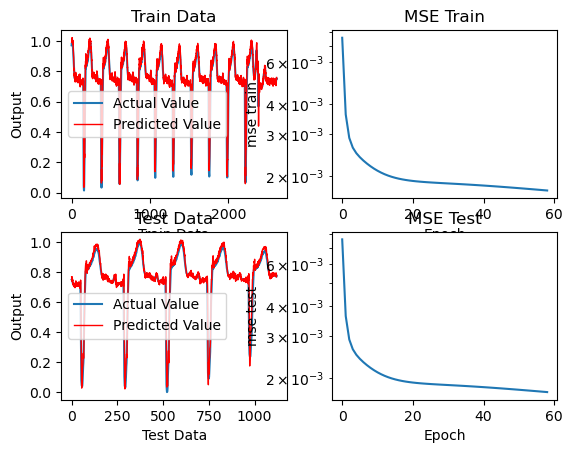

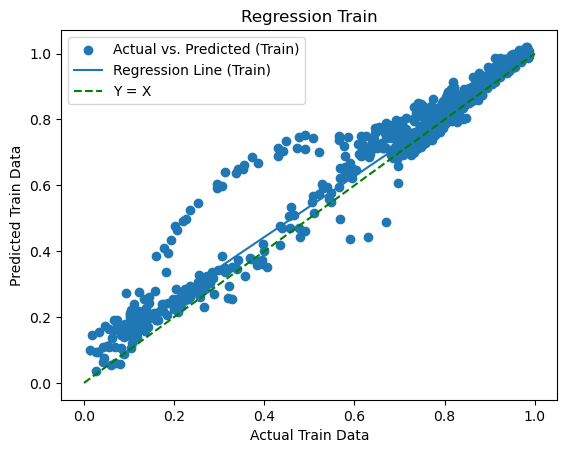

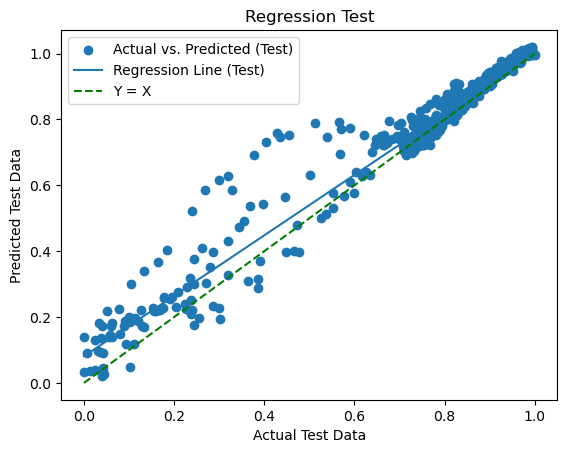

In [17]:
for t in range(epoch):
  error = np.zeros(num_train)
  for i in range(num_train):
    #Feed Forward
    input_data = data[i, :5]                                # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
    net1 = np.dot(w1, input_data.T) + bi1                   # 100 * 1
    o1 = (1 - np.exp(-net1)) / (1 + np.exp(-net1))          # 100 * 1
    net2 = np.dot(w2, o1) + bi2                             # 20 * 1
    o2 = (1 - np.exp(-net2)) / (1 + np.exp(-net2))          # 20 * 1
    net3 = np.dot(w3, o2) + bi3                             # 1 * 1
    o3 = (1 - np.exp(-net3))/(1 + np.exp(-net3))            # 1 * 1
    net4 = np.dot(w4, o3) + bi4
    o4 = net4
    target = data[i, 5]
    error[i] = (target - o4) 

    t1  = 2*np.exp(-net1)/(1+np.exp(-net1))**2
    A = np.diag(t1)

    t2 = 2*np.exp(-net2)/(1+np.exp(-net2))**2
    B = np.diag(t2)

    t3 = 2*np.exp(-net3)/(1+np.exp(-net3))**2
    C = np.diag(t3)
      

    #Back prppagetion
    w4  -= eta * (-2 * error[i] * o3 + 2*landa4 * w4)
    bi4 -= eta * -2*error[i]

    w3  -= (eta * -2 * error[i] * np.outer(np.dot(w4,  C), o2) + eta*2*landa3 * w3)
    bi3 -= eta * -2 * error[i] * np.dot(w4, C).reshape(n3)

    w2  -= (eta * -2 * error[i] * np.outer(np.dot(np.dot(w4, C), np.dot(w3,B)), o1) +  eta*2*landa2*w2)
    bi2 -= eta * -2 * error[i] * np.dot(np.dot(w4,C), np.dot(w3,B)).reshape(n2)

    w1  -= (eta * -2 * error[i] * np.outer(np.dot(np.dot(np.dot(w4,C), np.dot(w3,B)),np.dot(w2, A)), input_data) +  eta*2*landa1*w1)
    bi1 -= eta * -2 * error[i] * np.dot(np.dot(np.dot(w4,C), np.dot(w3,B)),np.dot(w2, A)).reshape(n1)

  error_square_train = np.zeros(num_train)
  output_data_train = np.zeros(num_train)
  for i in range(num_train):
    input_data = data[i, :5]                                # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
    net1 = np.dot(w1, input_data.T) + bi1                   # 100 * 1
    o1 = (1 - np.exp(-net1)) / (1 + np.exp(-net1))          # 100 * 1
    net2 = np.dot(w2, o1) + bi2                             # 20 * 1
    o2 = (1 - np.exp(-net2)) / (1 + np.exp(-net2))          # 20 * 1
    net3 = np.dot(w3, o2) + bi3                             # 1 * 1
    o3 = (1 - np.exp(-net3))/(1 + np.exp(-net3))            # 1 * 1
    net4 = np.dot(w4, o3) + bi4
    o4 = net4
    target = data[i, 5]
    output_data_train[i] = o4
    error[i] =  (target - o4)
    error_square_train[i] = (target - o4) ** 2
  mse_train[t] = np.mean(error_square_train)

  error_square_test = np.zeros(num_test)
  output_data_test = np.zeros(num_test)
  for i in range(num_test):
    input_data = data[num_train + i, :5]                    # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
    net1 = np.dot(w1, input_data.T) + bi1                   # 100 * 1
    o1 = (1 - np.exp(-net1)) / (1 + np.exp(-net1))          # 100 * 1
    net2 = np.dot(w2, o1) + bi2                             # 20 * 1
    o2 = (1 - np.exp(-net2)) / (1 + np.exp(-net2))          # 20 * 1
    net3 = np.dot(w3, o2) + bi3                             # 1 * 1
    o3 = (1 - np.exp(-net3))/(1 + np.exp(-net3))            # 1 * 1
    net4 = np.dot(w4, o3) + bi4
    o4 = net4
    output_data_test[i] = o4
    target = data[num_train + i, 5]
    error[i] = (target - o4) 
    error_square_test[i] = (target - o4) ** 2 
  mse_test[t] = np.mean(error_square_train)

  plt.subplot(2, 2, 1)
  plt.cla()  # Clear the previous plot
  plt.plot(data[:num_train, 5], label="Actual Value")
  plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
  plt.legend()
  plt.title('Train Data')
  plt.xlabel('Train Data')
  plt.ylabel('Output')

  # The MSE train data plot
  plt.subplot(2, 2, 2)
  plt.cla()
  plt.semilogy(mse_train[:t])
  plt.title('MSE Train')
  plt.xlabel('Epoch')
  plt.ylabel('mse train')

    # The test data plot
  plt.subplot(2, 2, 3)
  plt.cla()
  plt.plot(data[num_train:num_data, 5], label="Actual Value")
  plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
  plt.legend()
  plt.title('Test Data')
  plt.xlabel('Test Data')
  plt.ylabel('Output')

    # MSE test data plot
  plt.subplot(2, 2, 4)
  plt.cla()
  plt.semilogy(mse_test[:t])
  plt.title('MSE Test')
  plt.xlabel('Epoch')
  plt.ylabel('mse test')

  display(plt.gcf())
  clear_output(wait=True)


def plot_regression_line(x, y, label):
  coefficients = np.polyfit(x, y, 1)
  polynomial = np.poly1d(coefficients)
  x_line = np.linspace(min(x), max(x), 100)
  y_line = polynomial(x_line)
  plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()


**initilize Emotional MLp**

In [37]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n0, n1, n2, n3, n4 = 5, 80, 30, 10, 1
eta = 0.001
epoch = 120

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1
k1, k2 = 0.6, 0.4


#layer 1 information
np.random.seed(42)
w1 = np.random.randn(n1, n0)
bi1 = np.random.randn(n1)
net1 = np.zeros(n1)
o1 = np.zeros(n1)


#layer 2 information
w2 = np.random.randn(n2, n1)
bi2 = np.random.randn(n2)
net2 = np.zeros(n2)
o2 = np.zeros(n2)

#layer 3 information
w3 = np.random.randn(n3, n2)
bi3 = np.random.randn(n3)
net3 = np.zeros(n3)
o3 = np.zeros(n3)

#layer 4 information
w4 = np.random.randn(n4, n3)
bi4 = np.random.randn(n4)
net4 = np.zeros(n4)
o4 = np.zeros(n4)

landa1 = 0.0005
landa2 = 0.0005
landa3 = 0.00025
landa4 = 0.00025

**implemention Emotional**

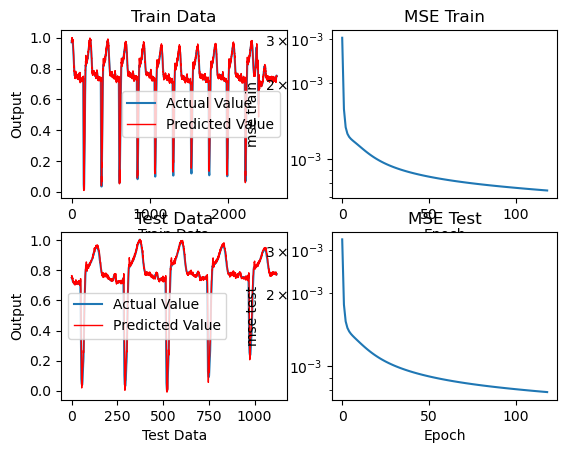

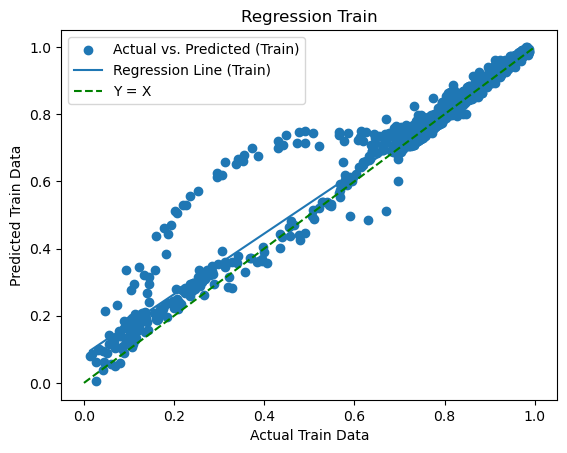

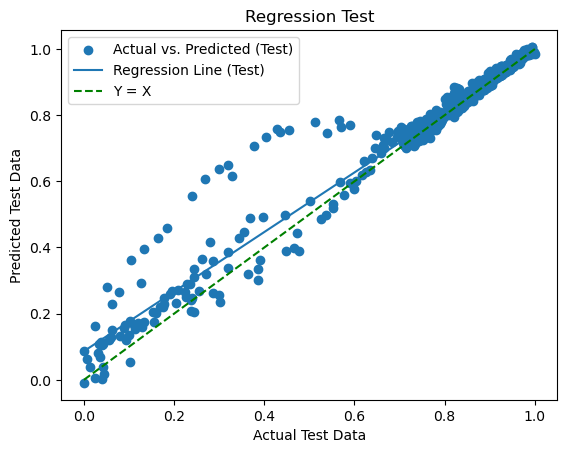

In [40]:
for t in range(epoch):
  error = np.zeros(num_train)
  r = np.zeros(num_train)
  for i in range(num_train):
    #Feed Forward
    input_data = data[i, :5]                                # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
    net1 = np.dot(w1, input_data.T) + bi1                   # 100 * 1
    o1 = (1 - np.exp(-net1)) / (1 + np.exp(-net1))          # 100 * 1
    net2 = np.dot(w2, o1) + bi2                             # 20 * 1
    o2 = (1 - np.exp(-net2)) / (1 + np.exp(-net2))          # 20 * 1
    net3 = np.dot(w3, o2) + bi3                             # 1 * 1
    o3 = (1 - np.exp(-net3))/(1 + np.exp(-net3))            # 1 * 1
    net4 = np.dot(w4, o3) + bi4
    o4 = net4
    target = data[i, 5]
    error[i] = (target - o4) 
    r[i] = (k1+k2)*error[i] - k2*error[i-1]

    t1  = 2*np.exp(-net1)/(1+np.exp(-net1))**2
    A = np.diag(t1)

    t2 = 2*np.exp(-net2)/(1+np.exp(-net2))**2
    B = np.diag(t2)

    t3 = 2*np.exp(-net3)/(1+np.exp(-net3))**2
    C = np.diag(t3)
      

    #Back prppagetion
    w4  -= eta * (-2 *(k1+k2)* r[i] * o3 + 2*landa4 * w4)
    bi4 -= eta * -2*(k1+k2)* r[i]

    w3  -= (eta * -2 *(k1+k2)* r[i] * np.outer(np.dot(w4,  C), o2) + eta*2*landa3 * w3)
    bi3 -= eta * -2 *(k1+k2)*  r[i] * np.dot(w4, C).reshape(n3)

    w2  -= (eta * -2 *(k1+k2)* r[i] * np.outer(np.dot(np.dot(w4, C), np.dot(w3,B)), o1) +  eta*2*landa2*w2)
    bi2 -= eta * -2 *(k1+k2)*  r[i] * np.dot(np.dot(w4,C), np.dot(w3,B)).reshape(n2)

    w1  -= (eta * -2 *(k1+k2)* r[i] * np.outer(np.dot(np.dot(np.dot(w4,C), np.dot(w3,B)),np.dot(w2, A)), input_data) +  eta*2*landa1*w1)
    bi1 -= eta * -2 * (k1+k2)* r[i] * np.dot(np.dot(np.dot(w4,C), np.dot(w3,B)),np.dot(w2, A)).reshape(n1)

  error_square_train = np.zeros(num_train)
  output_data_train = np.zeros(num_train)
  for i in range(num_train):
    input_data = data[i, :5]                                # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
    net1 = np.dot(w1, input_data.T) + bi1                   # 100 * 1
    o1 = (1 - np.exp(-net1)) / (1 + np.exp(-net1))          # 100 * 1
    net2 = np.dot(w2, o1) + bi2                             # 20 * 1
    o2 = (1 - np.exp(-net2)) / (1 + np.exp(-net2))          # 20 * 1
    net3 = np.dot(w3, o2) + bi3                             # 1 * 1
    o3 = (1 - np.exp(-net3))/(1 + np.exp(-net3))            # 1 * 1
    net4 = np.dot(w4, o3) + bi4
    o4 = net4
    target = data[i, 5]
    output_data_train[i] = o4
    error[i] =  (target - o4)
    r[i] = (k1+k2)*error[i] - k2*error[i-1]
    error_square_train[i] = (r[i]) ** 2
  mse_train[t] = np.mean(error_square_train)

  error_square_test = np.zeros(num_test)
  output_data_test = np.zeros(num_test)
  for i in range(num_test):
    input_data = data[num_train + i, :5]                    # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
    net1 = np.dot(w1, input_data.T) + bi1                   # 100 * 1
    o1 = (1 - np.exp(-net1)) / (1 + np.exp(-net1))          # 100 * 1
    net2 = np.dot(w2, o1) + bi2                             # 20 * 1
    o2 = (1 - np.exp(-net2)) / (1 + np.exp(-net2))          # 20 * 1
    net3 = np.dot(w3, o2) + bi3                             # 1 * 1
    o3 = (1 - np.exp(-net3))/(1 + np.exp(-net3))            # 1 * 1
    net4 = np.dot(w4, o3) + bi4
    o4 = net4
    output_data_test[i] = o4
    target = data[num_train + i, 5]
    error[i] = (target - o4) 
    r[i] = (k1+k2)*error[i] - k2*error[i-1]
    error_square_train[i] = (r[i]) ** 2
 
  mse_test[t] = np.mean(error_square_train)

  plt.subplot(2, 2, 1)
  plt.cla()  # Clear the previous plot
  plt.plot(data[:num_train, 5], label="Actual Value")
  plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
  plt.legend()
  plt.title('Train Data')
  plt.xlabel('Train Data')
  plt.ylabel('Output')

  # The MSE train data plot
  plt.subplot(2, 2, 2)
  plt.cla()
  plt.semilogy(mse_train[:t])
  plt.title('MSE Train')
  plt.xlabel('Epoch')
  plt.ylabel('mse train')

    # The test data plot
  plt.subplot(2, 2, 3)
  plt.cla()
  plt.plot(data[num_train:num_data, 5], label="Actual Value")
  plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
  plt.legend()
  plt.title('Test Data')
  plt.xlabel('Test Data')
  plt.ylabel('Output')

    # MSE test data plot
  plt.subplot(2, 2, 4)
  plt.cla()
  plt.semilogy(mse_test[:t])
  plt.title('MSE Test')
  plt.xlabel('Epoch')
  plt.ylabel('mse test')

  display(plt.gcf())
  clear_output(wait=True)


def plot_regression_line(x, y, label):
  coefficients = np.polyfit(x, y, 1)
  polynomial = np.poly1d(coefficients)
  x_line = np.linspace(min(x), max(x), 100)
  y_line = polynomial(x_line)
  plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()


**initialize Emotional and  flexible MLP**

In [62]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n0, n1, n2, n3, n4 = 5, 80, 30, 10, 1
eta = 0.0009
epoch = 100

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1
k1, k2 = 0.8, 0.2


#layer 1 information
np.random.seed(42)
w1 = np.random.randn(n1, n0)
bi1 = np.random.randn(n1)
alpha1 = np.random.randn(n1)
net1 = np.zeros(n1)
o1 = np.zeros(n1)


#layer 2 information
w2 = np.random.randn(n2, n1)
bi2 = np.random.randn(n2)
alpha2 = np.random.randn(n2)
net2 = np.zeros(n2)
o2 = np.zeros(n2)

#layer 3 information
w3 = np.random.randn(n3, n2)
bi3 = np.random.randn(n3)
alpha3 = np.random.randn(n3)
net3 = np.zeros(n3)
o3 = np.zeros(n3)

#layer 4 information
w4 = np.random.randn(n4, n3)
bi4 = np.random.randn(n4)
net4 = np.zeros(n4)
o4 = np.zeros(n4)

landa1 = 0.0005
landa2 = 0.0005
landa3 = 0.00025
landa4 = 0.00025

**implemention Emotional and flexible MLP**

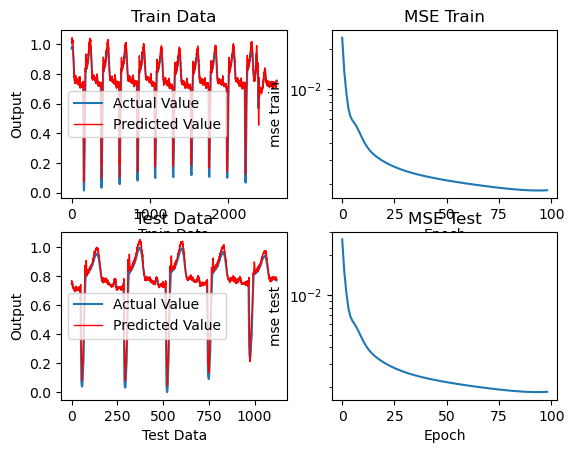

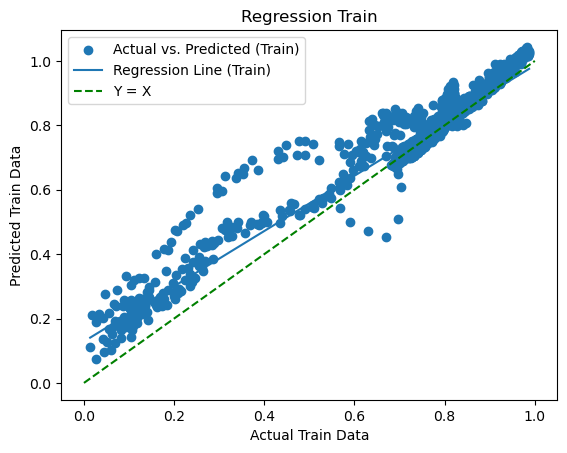

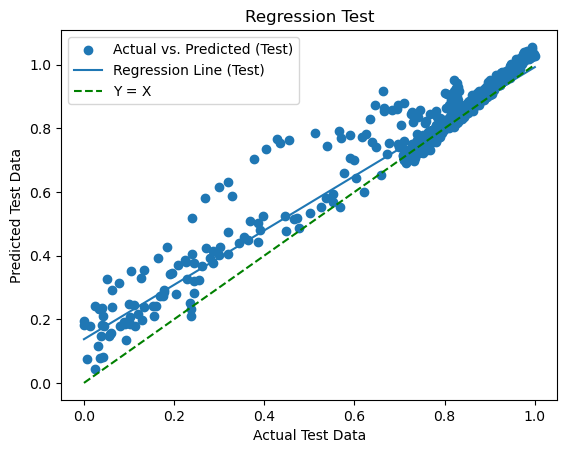

In [65]:
for t in range(epoch):
  error = np.zeros(num_train)
  r = np.zeros(num_train)
  for i in range(num_train):
    #Feed Forward
    input_data = data[i, :5]                                # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
    net1 = np.dot(w1, input_data.T) + bi1                   # 100 * 1
    o1 = (1 - np.exp(-net1*alpha1)) / (alpha1*(1 + np.exp(-net1*alpha1)))          # 100 * 1
    net2 = np.dot(w2, o1) + bi2                             # 20 * 1
    o2 = (1 - np.exp(-net2*alpha2)) / (alpha2*(1 + np.exp(-net2*alpha2)))          # 20 * 1
    net3 = np.dot(w3, o2) + bi3                             # 1 * 1
    o3 = (1 - np.exp(-net3*alpha3))/(alpha3*(1 + np.exp(-net3*alpha3)))            # 1 * 1
    net4 = np.dot(w4, o3) + bi4
    o4 = net4
    target = data[i, 5]
    error[i] = (target - o4) 
    r[i] = (k1+k2)*error[i] - k2*error[i-1]
      
    #fprim
    t1  = 2*np.exp(-net1*alpha1)/(1+np.exp(-net1*alpha1))**2
    A = np.diag(t1)

    t2 = 2*np.exp(-net2*alpha2)/((1+np.exp(-net2*alpha2))**2)
    B = np.diag(t2)

    t3 = 2*np.exp(-net3*alpha3)/((1+np.exp(-net3*alpha3))**2)
    C = np.diag(t3)
    #f star
    #t4 = ((2*alpha1*net1+1)*np.exp(-alpha1*net1)-1)/(alpha1*(1+np.exp(-alpha1*net1)))**2  
    #D = np.diag(t4)
    t4 = ((2*alpha1*net1+np.exp(-alpha1*net1))*np.exp(-alpha1*net1)-1)/(alpha1*(1+np.exp(-alpha1*net1)))**2 
    D = np.diag(t4)
    #t5 = ((2*alpha2*net2+1)*np.exp(-alpha2*net2)-1)/(alpha2*(1+np.exp(-alpha2*net2)))**2  
    #E = np.diag(t5)
    t5 = ((2*alpha2*net2+np.exp(-alpha2*net2))*np.exp(-alpha2*net2)-1)/(alpha2*(1+np.exp(-alpha2*net2)))**2
    E = np.diag(t5)

    #t6 = ((2*alpha3*net3+1)*np.exp(-alpha3*net3)-1)/(alpha3*(1+np.exp(-alpha3*net3)))**2  
    #F = np.diag(t6)
    t6 = ((2*alpha3*net3+np.exp(-alpha3*net3))*np.exp(-alpha3*net3)-1)/(alpha3*(1+np.exp(-alpha3*net3)))**2  
    F = np.diag(t6)
      

    #Back prppagetion
    w4  -= eta * (-2 *(k1+k2)* r[i] * o3 + 2*landa4 * w4)
    bi4 -= eta * -2*(k1+k2)*r[i]

    w3  -= (eta * -2 *(k1+k2)* r[i] * np.outer(np.dot(w4,  C), o2) + eta*2*landa3 * w3)
    bi3 -= eta * -2 *(k1+k2)* r[i] * np.dot(w4, C).reshape(n3)
    alpha3 -= eta* -2* (k1+k2)*r[i]*np.dot(w4, F).reshape(n3)

    w2  -= (eta * -2 *(k1+k2)* r[i] * np.outer(np.dot(np.dot(w4, C), np.dot(w3,B)), o1) +  eta*2*landa2*w2)
    bi2 -= eta * -2 *(k1+k2)* r[i] * np.dot(np.dot(w4,C), np.dot(w3,B)).reshape(n2)
    alpha2 -= eta* -2* (k1+k2)*r[i]* np.dot(np.dot(w4, C), np.dot(w3, E)).reshape(n2)
                                      
    w1  -= (eta * -2 *(k1+k2)* r[i] * np.outer(np.dot(np.dot(np.dot(w4,C), np.dot(w3,B)),np.dot(w2, A)), input_data) +  eta*2*landa1*w1)
    bi1 -= eta * -2 * (k1+k2)*r[i] * np.dot(np.dot(np.dot(w4,C), np.dot(w3,B)),np.dot(w2, A)).reshape(n1)
    alpha1 -= eta* -2* (k1+k2)*r[i]* np.dot(np.dot(np.dot(w4, C), np.dot(w3, B)), np.dot(w2, D)).reshape(n1)

  error_square_train = np.zeros(num_train)
  output_data_train = np.zeros(num_train)
  for i in range(num_train):
    input_data = data[i, :5]                                # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
    net1 = np.dot(w1, input_data.T) + bi1                   # 100 * 1
    o1 = (1 - np.exp(-net1*alpha1)) / (alpha1*(1 + np.exp(-net1*alpha1)))          # 100 * 1
    net2 = np.dot(w2, o1) + bi2                             # 20 * 1
    o2 = (1 - np.exp(-net2*alpha2)) / (alpha2*(1 + np.exp(-net2*alpha2)))          # 20 * 1
    net3 = np.dot(w3, o2) + bi3                             # 1 * 1
    o3 = (1 - np.exp(-net3*alpha3))/ (alpha3*(1 + np.exp(-net3*alpha3)))            # 1 * 1
    net4 = np.dot(w4, o3) + bi4
    o4 = net4
    target = data[i, 5]
    output_data_train[i] = o4
    error[i] =  (target - o4)
    r[i] = (k1+k2)*error[i] - k2*error[i-1]
    error_square_train[i] = (r[i]) ** 2
  mse_train[t] = np.mean(error_square_train)

  error_square_test = np.zeros(num_test)
  output_data_test = np.zeros(num_test)
  for i in range(num_test):
    input_data = data[num_train + i, :5]                    # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
    net1 = np.dot(w1, input_data.T) + bi1                   # 100 * 1
    o1 = (1 - np.exp(-net1*alpha1)) / (alpha1*(1 + np.exp(-net1*alpha1)))          # 100 * 1
    net2 = np.dot(w2, o1) + bi2                             # 20 * 1
    o2 = (1 - np.exp(-net2*alpha2)) / (alpha2*(1 + np.exp(-net2*alpha2)))          # 20 * 1
    net3 = np.dot(w3, o2) + bi3                             # 1 * 1
    o3 = (1 - np.exp(-net3*alpha3))/ (alpha3*(1 + np.exp(-net3*alpha3)))            # 1 * 1
    net4 = np.dot(w4, o3) + bi4
    o4 = net4
    output_data_test[i] = o4
    target = data[num_train + i, 5]
    error[i] = (target - o4) 
    r[i] = (k1+k2)*error[i] - k2*error[i-1]
    error_square_train[i] = (r[i]) ** 2
 
  mse_test[t] = np.mean(error_square_train)

  plt.subplot(2, 2, 1)
  plt.cla()  # Clear the previous plot
  plt.plot(data[:num_train, 5], label="Actual Value")
  plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
  plt.legend()
  plt.title('Train Data')
  plt.xlabel('Train Data')
  plt.ylabel('Output')

  # The MSE train data plot
  plt.subplot(2, 2, 2)
  plt.cla()
  plt.semilogy(mse_train[:t])
  plt.title('MSE Train')
  plt.xlabel('Epoch')
  plt.ylabel('mse train')

    # The test data plot
  plt.subplot(2, 2, 3)
  plt.cla()
  plt.plot(data[num_train:num_data, 5], label="Actual Value")
  plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
  plt.legend()
  plt.title('Test Data')
  plt.xlabel('Test Data')
  plt.ylabel('Output')

    # MSE test data plot
  plt.subplot(2, 2, 4)
  plt.cla()
  plt.semilogy(mse_test[:t])
  plt.title('MSE Test')
  plt.xlabel('Epoch')
  plt.ylabel('mse test')

  display(plt.gcf())
  clear_output(wait=True)


def plot_regression_line(x, y, label):
  coefficients = np.polyfit(x, y, 1)
  polynomial = np.poly1d(coefficients)
  x_line = np.linspace(min(x), max(x), 100)
  y_line = polynomial(x_line)
  plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()


**initialize Emotional, flexible and Adaptive MLP**

In [57]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n0, n1, n2, n3, n4 = 5, 27,20, 10, 1

landa = 0.000003
epoch = 150

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = 0.001, 0.001
k1, k2 = 0.6, 0.4


np.random.seed(42)
w1p = w1 = np.random.randn(n1, n0)
etaw1 = np.random.uniform(a,b,(n1,n0))
bi1 = np.random.randn(n1)
etabi1  =np.random.uniform(a,b,n1)
alpha1 = np.random.randn(n1)
etaa1 = np.random.uniform(a,b,n1)
net1 = np.zeros(n1)
o1p = o1 = np.zeros(n1)


#layer 2 information
w2p = w2 = np.random.randn(n2, n1)
etaw2 = np.random.uniform(a,b,(n2,n1))
bi2 = np.random.randn(n2)
etabi2 = np.random.uniform(a,b, n2)
alpha2 = np.random.randn(n2)
etaa2 = np.random.uniform(a,b,n2)
net2 = np.zeros(n2)
o2p = o2 = np.zeros(n2)

#layer 3 information
w3p =w3 = np.random.randn(n3, n2)
etaw3 = np.random.uniform(a,b, (n3,n2))
bi3 = np.random.randn(n3)
etabi3 = np.random.uniform(a,b, n3)
alpha3 = np.random.randn(n3)
etaa3 = np.random.uniform(a,b,n3)
net3 = np.zeros(n3)
o3=o3p = np.zeros(n3)

#layer 4 information
w4=w4p = np.random.randn(n4, n3)
etaw4 = np.random.uniform(a,b,(n4,n3))
bi4 = np.random.randn(n4)
etabi4 = np.random.uniform(a,b, n4)
net4 = np.zeros(n4)
o4 = np.zeros(n4)


landa1 = 0.0005
landa2 = 0.0005
landa3 = 0.00025
landa4 = 0.00025

Fp = F =np.diag(np.ones(n3))
Cp = C =np.diag(np.ones(n3))
Bp = B =np.diag(np.ones(n2))
Ep = E = np.diag(np.ones(n2))
Ap = A = np.diag(np.ones(n1))
Dp = D = np.diag(np.ones(n1))

**implemention Emotional, flexible and adaptive MLP**

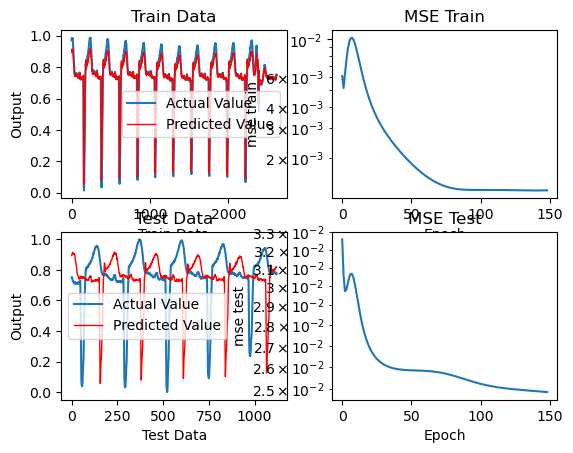

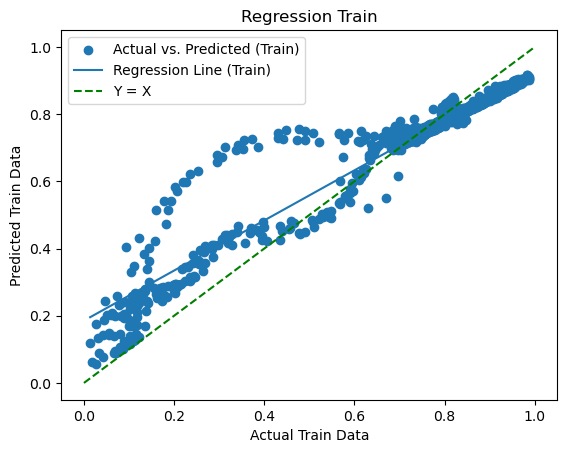

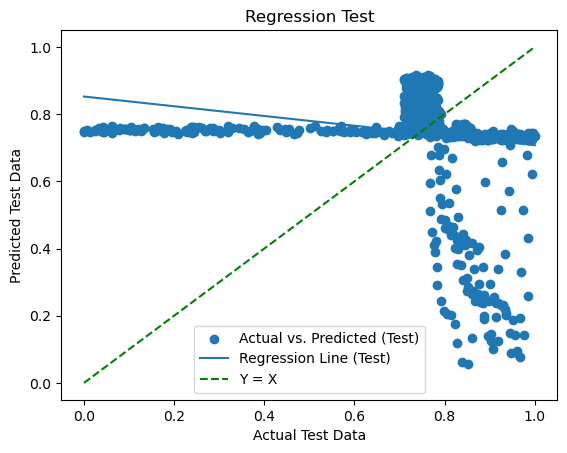

In [60]:
for t in range(epoch):
    error = np.zeros(num_train)
    r = np.zeros(num_train)
    for i in range(num_train):
        #Feed Forward
        input_data = data[i, :5]                                                      
        net1 = np.dot(w1, input_data.T) + bi1                                         
        o1 = (1 - np.exp(-net1*alpha1)) / (alpha1*(1 + np.exp(-net1*alpha1)))          
        net2 = np.dot(w2, o1) + bi2                                                    
        o2 = (1 - np.exp(-net2*alpha2)) / (alpha2*(1 + np.exp(-net2*alpha2)))          
        net3 = np.dot(w3, o2) + bi3                                                   
        o3 = (1 - np.exp(-net3*alpha3))/(alpha3*(1 + np.exp(-net3*alpha3)))           
        net4 = np.dot(w4, o3) + bi4
        o4 = net4
        target = data[i, 5]
        error[i] = (target - o4) 
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
        
        # f prim 
        t1  = 2*np.exp(-net1*alpha1)/(1+np.exp(-net1*alpha1))**2
        A = np.diag(t1)
        t2 = 2*np.exp(-net2*alpha2)/((1+np.exp(-net2*alpha2))**2)
        B = np.diag(t2)
        t3 = 2*np.exp(-net3*alpha3)/((1+np.exp(-net3*alpha3))**2)
        C = np.diag(t3)
        
        #fstar
        t4 = ((2*alpha1*net1+np.exp(-alpha1*net1))*np.exp(-alpha1*net1)-1)/(alpha1*(1+np.exp(-alpha1*net1)))**2  
        D = np.diag(t4)
        t5 = ((2*alpha2*net2+np.exp(-alpha2*net2))*np.exp(-alpha2*net2)-1)/(alpha2*(1+np.exp(-alpha2*net2)))**2  
        E = np.diag(t5)
        t6 = ((2*alpha3*net3+np.exp(-alpha3*net3))*np.exp(-alpha3*net3)-1)/(alpha3*(1+np.exp(-alpha3*net3)))**2  
        F = np.diag(t6)
        
        #Back prppagetion
        #layer4
        gradw4 = -2*r[i]*(k1+k2)*o3
        gradw4p = -2*r[i-1]*(k1+k2)*o3p

        etaw4 -= landa*gradw4*-1*(gradw4p+2*landa4*w4p)
        w4    -= (etaw4*gradw4+2*etaw4*landa4*w4)

        gradbi4 = -2*r[i]*(k1+k2)
        gradbi4p = -2*r[i-1]*(k1+k2)

        etabi4 -=landa*gradbi4*-1*gradbi4p
        bi4   -= etabi4*gradbi4
        
        #layer3
        gradw3 = -2*(k1+k2)*r[i]*np.outer(np.dot(w4,C),o2)
        gradw3p = -2*r[i-1]*(k1+k2)*np.outer(np.dot(w4p,Cp),o2p)

        etaw3  -= landa*gradw3*-1*(gradw3p+2*landa3*w3p)
        w3     -= (etaw3*gradw3 + etaw3*2*landa3*w3)
        
        gradbi3 = -2*(k1+k2)*r[i]*np.dot(w4, C)
        gradbi3p = -2*(k1+k2)*r[i-1]*np.dot(w4p, Cp)

        etabi3 -=(landa*gradbi3*-1*gradbi3p).reshape(n3)
        bi3    -= (etabi3*gradbi3).reshape(n3)

        gradalpha3 = -2*r[i]*(k1+k2)*np.dot(w4, F)
        gradalpha3p = -2*r[i-1]*(k1+k2)*np.dot(w4p, Fp)

        etaa3  -=(landa*gradalpha3*-1*gradalpha3p).reshape(n3)
        alpha3 -= (etaa3*gradalpha3).reshape(n3)
        
        #layer2
        gradw2  = -2*(k1+k2)*r[i]*np.outer(np.dot(np.dot(np.dot(w4,C),w3),B), o1)
        gradw2p = -2*(k1+k2)*r[i-1]*np.outer(np.dot(np.dot(np.dot(w4p,Cp),w3p),Bp), o1p)

        etaw2  -= landa*gradw2*-1*(gradw2p+2*landa2*w2p)
        w2     -= (etaw2*gradw2+ etaw2*2*landa2*w2)

        gradbi2 = -2*r[i]*(k1+k2)*np.dot(np.dot(w4, C),np.dot(w3,B))
        gradbi2p = -2*(k1+k2)*r[i-1]*np.dot(np.dot(w4p, Cp),np.dot(w3p,Bp))

        etabi2  -=(landa*gradbi2*-1*gradbi2p).reshape(n2)
        bi2    -= etabi2*gradbi2.reshape(n2)

        gradalpha2 = -2*r[i]*(k1+k2)*np.dot(np.dot(w4,C),np.dot(w3,E))
        gradalpha2p = -2*r[i-1]*(k1+k2)*np.dot(np.dot(w4p,Cp), np.dot(w3p,Ep))

        etaa2 -= (landa*gradalpha2*-1*gradalpha2p).reshape(n2)
        alpha2 -= (etaa2*gradalpha2).reshape(n2) 
        
        #layer1
        gradw1 = -2*r[i]*(k1+k2)*np.outer(np.dot(np.dot(np.dot(w4,C),np.dot(w3,B)),np.dot(w2,A)),data[i, :5])
        gradw1p = -2*r[i-1]*(k1+k2)*np.outer(np.dot(np.dot(np.dot(w4p,Cp),np.dot(w3p,Bp)),np.dot(w2p,Ap)),data[i-1, :5])

        etaw1  -=landa*gradw1*-1*(gradw1p+2*landa1*w1p)
        w1     -= (etaw1*gradw1+etaw1*2*landa1*w1)

        gradbi1 = -2*r[i]*(k1+k2)*np.dot(np.dot(np.dot(w4,C), np.dot(w3,B)),np.dot(w2,A))
        gradbi1p = -2*r[i-1]*(k1+k2)*np.dot(np.dot(np.dot(w4p,Cp), np.dot(w3p,Bp)),np.dot(w2p,Ap))

        etabi1 -=(landa*gradbi1*-1*gradbi1p).reshape(n1)
        bi1    -= (etabi1* gradbi1).reshape(n1)

        gradalpha1 = -2*r[i]*(k1+k2)*np.dot(np.dot(np.dot(w4,C),np.dot(w3,B)),np.dot(w2,D))
        gradalpha1p = -2*r[i-1]*(k1+k2)*np.dot(np.dot(np.dot(w4p,Cp),np.dot(w3p,Bp)),np.dot(w2p,Dp))

        etaa1  -=(landa*gradalpha1*-1*gradalpha1p).reshape(n1)
        alpha1 -= (etaa1*gradalpha1).reshape(n1)

        w4p = w4
        o3p = o3
        w3p = w3
        o2p = o2
        Cp = C
        Fp = F
        w2p = w2
        Bp = B
        o1p = o1
        w2p = w2
        Ep = E
        w1p = w1
        Ap =A
        Dp = D

    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros(num_train)
    for i in range(num_train):
        input_data = data[i, :5]                              
        net1 = np.dot(w1, input_data.T) + bi1                  
        o1 = (1 - np.exp(-net1*alpha1)) / (alpha1*(1 + np.exp(-net1*alpha1)))        
        net2 = np.dot(w2, o1) + bi2                            
        o2 = (1 - np.exp(-net2*alpha2)) / (alpha2*(1 + np.exp(-net2*alpha2)))         
        net3 = np.dot(w3, o2) + bi3                             
        o3 = (1 - np.exp(-net3*alpha3))/(alpha3*(1 + np.exp(-net3*alpha3)))            
        net4 = np.dot(w4, o3) + bi4
        o4 = net4
        target = data[i, 5]
        output_data_train[i] = o4
        error[i] =  (target - o4)
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
        error_square_train[i] = (r[i])** 2
    mse_train[t] = np.mean(error_square_train)

    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros(num_test)
    for i in range(num_test):
        input_data = data[i, :5]                                
        net1 = np.dot(w1, input_data.T) + bi1                  
        o1 = (1 - np.exp(-net1*alpha1)) / (alpha1*(1 + np.exp(-net1*alpha1)))         
        net2 = np.dot(w2, o1) + bi2                           
        o2 = (1 - np.exp(-net2*alpha2)) / (alpha2*(1 + np.exp(-net2*alpha2)))          
        net3 = np.dot(w3, o2) + bi3                             
        o3 = (1 - np.exp(-net3*alpha3))/(alpha3*(1 + np.exp(-net3*alpha3)))            
        net4 = np.dot(w4, o3) + bi4
        o4 = net4
        output_data_test[i] = o4
        target = data[num_train + i, 5]
        error[i] = (target - o4) 
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
        error_square_test[i] = (r[i]) ** 2
 
    mse_test[t] = np.mean(error_square_test)

    plt.subplot(2, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(data[:num_train, 5], label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')

    #The MSE train data plot
    plt.subplot(2, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')

    # The test data plot
    plt.subplot(2, 2, 3)
    plt.cla()
    plt.plot(data[num_train:num_data, 5], label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')

    # MSE test data plot
    plt.subplot(2, 2, 4)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')

    display(plt.gcf())
    clear_output(wait=True)


def plot_regression_line(x, y, label):
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    x_line = np.linspace(min(x), max(x), 100)
    y_line = polynomial(x_line)
    plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()


**Lorenz Dataset**

In [122]:
import numpy as np
import pandas as pd 
df = pd.read_excel("C:/Users/ISD/Python_ali/ANNKNT/regression/Lorenz Dataset.xlsx")
data_L = df.to_numpy()

**preparing Dataset**

In [124]:
data = data_L
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from IPython.display import display, clear_output

def createTimeSeries(data):
    tw = 8  #window
    l = data.shape[0] - tw -1
    time_series_array = np.zeros((l, tw-2))

    # Populate the time series array
    for i in range(time_series_array.shape[0]):
      for j in range(6):
        if j!=5:
          time_series_array[i, j] = data[i+j]
        elif j==5:
           time_series_array[i, j] = data[i+j+2]
    return  time_series_array


data = createTimeSeries(data)

def normalizeData(data):
  for ii in range(6):
      data[:, ii] = (data[:, ii] - np.min(data[:, ii])) /(np.max(data[:, ii]) - np.min(data[:, ii]))
  return data
data = normalizeData(data)
data[0, :]

C:\Users\ISD\AppData\Local\Temp\ipykernel_11952\198117872.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j]
C:\Users\ISD\AppData\Local\Temp\ipykernel_11952\198117872.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j+2]


array([0.4936747 , 0.49594005, 0.49797068, 0.49980834, 0.50149056,
       0.50592521])

**initialize convetional MLp**

In [27]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n0, n1, n2, n3, n4 = 5, 80, 30, 10, 1
eta = 0.001
epoch = 150

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1


#layer 1 information
np.random.seed(42)
w1 = np.random.randn(n1, n0)
bi1 = np.random.randn(n1)
net1 = np.zeros(n1)
o1 = np.zeros(n1)


#layer 2 information
w2 = np.random.randn(n2, n1)
bi2 = np.random.randn(n2)
net2 = np.zeros(n2)
o2 = np.zeros(n2)

#layer 3 information
w3 = np.random.randn(n3, n2)
bi3 = np.random.randn(n3)
net3 = np.zeros(n3)
o3 = np.zeros(n3)

#layer 4 information
w4 = np.random.randn(n4, n3)
bi4 = np.random.randn(n4)
net4 = np.zeros(n4)
o4 = np.zeros(n4)

landa1 = 0.0005
landa2 = 0.0005
landa3 = 0.00025
landa4 = 0.00025

**implemntion convetional MLP**

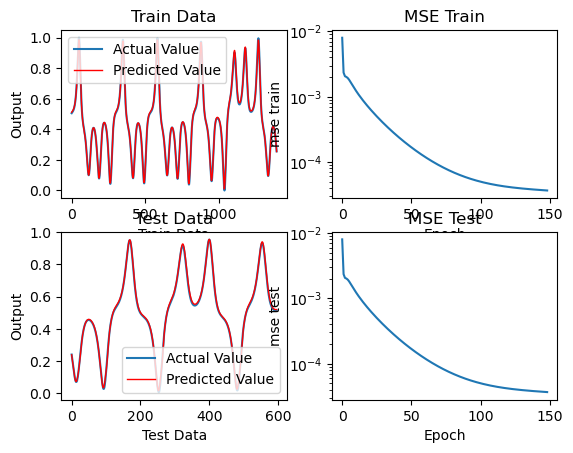

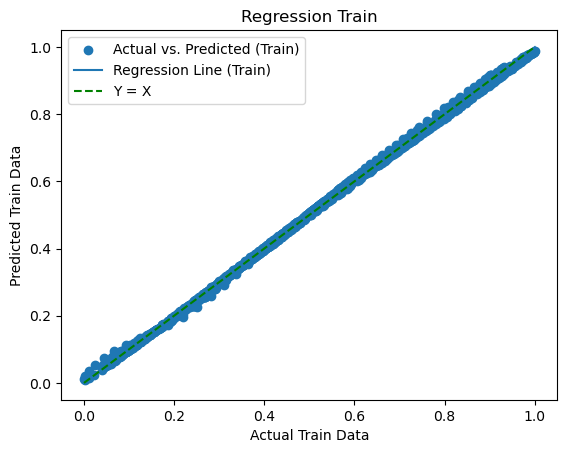

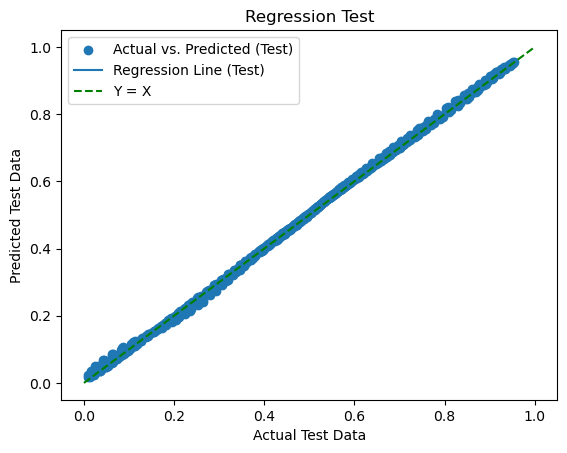

In [30]:
for t in range(epoch):
  error = np.zeros(num_train)
  for i in range(num_train):
    #Feed Forward
    input_data = data[i, :5]                                # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
    net1 = np.dot(w1, input_data.T) + bi1                   # 100 * 1
    o1 = (1 - np.exp(-net1)) / (1 + np.exp(-net1))          # 100 * 1
    net2 = np.dot(w2, o1) + bi2                             # 20 * 1
    o2 = (1 - np.exp(-net2)) / (1 + np.exp(-net2))          # 20 * 1
    net3 = np.dot(w3, o2) + bi3                             # 1 * 1
    o3 = (1 - np.exp(-net3))/(1 + np.exp(-net3))            # 1 * 1
    net4 = np.dot(w4, o3) + bi4
    o4 = net4
    target = data[i, 5]
    error[i] = (target - o4) 

    t1  = 2*np.exp(-net1)/(1+np.exp(-net1))**2
    A = np.diag(t1)

    t2 = 2*np.exp(-net2)/(1+np.exp(-net2))**2
    B = np.diag(t2)

    t3 = 2*np.exp(-net3)/(1+np.exp(-net3))**2
    C = np.diag(t3)
      

    #Back prppagetion
    w4  -= eta * (-2 * error[i] * o3 + 2*landa4 * w4)
    bi4 -= eta * -2*error[i]

    w3  -= (eta * -2 * error[i] * np.outer(np.dot(w4,  C), o2) + eta*2*landa3 * w3)
    bi3 -= eta * -2 * error[i] * np.dot(w4, C).reshape(n3)

    w2  -= (eta * -2 * error[i] * np.outer(np.dot(np.dot(w4, C), np.dot(w3,B)), o1) +  eta*2*landa2*w2)
    bi2 -= eta * -2 * error[i] * np.dot(np.dot(w4,C), np.dot(w3,B)).reshape(n2)

    w1  -= (eta * -2 * error[i] * np.outer(np.dot(np.dot(np.dot(w4,C), np.dot(w3,B)),np.dot(w2, A)), input_data) +  eta*2*landa1*w1)
    bi1 -= eta * -2 * error[i] * np.dot(np.dot(np.dot(w4,C), np.dot(w3,B)),np.dot(w2, A)).reshape(n1)

  error_square_train = np.zeros(num_train)
  output_data_train = np.zeros(num_train)
  for i in range(num_train):
    input_data = data[i, :5]                                # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
    net1 = np.dot(w1, input_data.T) + bi1                   # 100 * 1
    o1 = (1 - np.exp(-net1)) / (1 + np.exp(-net1))          # 100 * 1
    net2 = np.dot(w2, o1) + bi2                             # 20 * 1
    o2 = (1 - np.exp(-net2)) / (1 + np.exp(-net2))          # 20 * 1
    net3 = np.dot(w3, o2) + bi3                             # 1 * 1
    o3 = (1 - np.exp(-net3))/(1 + np.exp(-net3))            # 1 * 1
    net4 = np.dot(w4, o3) + bi4
    o4 = net4
    target = data[i, 5]
    output_data_train[i] = o4
    error[i] =  (target - o4)
    error_square_train[i] = (target - o4) ** 2
  mse_train[t] = np.mean(error_square_train)

  error_square_test = np.zeros(num_test)
  output_data_test = np.zeros(num_test)
  for i in range(num_test):
    input_data = data[num_train + i, :5]                    # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
    net1 = np.dot(w1, input_data.T) + bi1                   # 100 * 1
    o1 = (1 - np.exp(-net1)) / (1 + np.exp(-net1))          # 100 * 1
    net2 = np.dot(w2, o1) + bi2                             # 20 * 1
    o2 = (1 - np.exp(-net2)) / (1 + np.exp(-net2))          # 20 * 1
    net3 = np.dot(w3, o2) + bi3                             # 1 * 1
    o3 = (1 - np.exp(-net3))/(1 + np.exp(-net3))            # 1 * 1
    net4 = np.dot(w4, o3) + bi4
    o4 = net4
    output_data_test[i] = o4
    target = data[num_train + i, 5]
    error[i] = (target - o4) 
    error_square_test[i] = (target - o4) ** 2 
  mse_test[t] = np.mean(error_square_train)

  plt.subplot(2, 2, 1)
  plt.cla()  # Clear the previous plot
  plt.plot(data[:num_train, 5], label="Actual Value")
  plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
  plt.legend()
  plt.title('Train Data')
  plt.xlabel('Train Data')
  plt.ylabel('Output')

  # The MSE train data plot
  plt.subplot(2, 2, 2)
  plt.cla()
  plt.semilogy(mse_train[:t])
  plt.title('MSE Train')
  plt.xlabel('Epoch')
  plt.ylabel('mse train')

    # The test data plot
  plt.subplot(2, 2, 3)
  plt.cla()
  plt.plot(data[num_train:num_data, 5], label="Actual Value")
  plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
  plt.legend()
  plt.title('Test Data')
  plt.xlabel('Test Data')
  plt.ylabel('Output')

    # MSE test data plot
  plt.subplot(2, 2, 4)
  plt.cla()
  plt.semilogy(mse_test[:t])
  plt.title('MSE Test')
  plt.xlabel('Epoch')
  plt.ylabel('mse test')

  display(plt.gcf())
  clear_output(wait=True)


def plot_regression_line(x, y, label):
  coefficients = np.polyfit(x, y, 1)
  polynomial = np.poly1d(coefficients)
  x_line = np.linspace(min(x), max(x), 100)
  y_line = polynomial(x_line)
  plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()


**initialize Emotional MLP**

In [47]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n0, n1, n2, n3, n4 = 5, 80, 30, 10, 1
eta = 0.001
epoch = 150

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1
k1, k2 = 0.6, 0.4


#layer 1 information
np.random.seed(42)
w1 = np.random.randn(n1, n0)
bi1 = np.random.randn(n1)
net1 = np.zeros(n1)
o1 = np.zeros(n1)


#layer 2 information
w2 = np.random.randn(n2, n1)
bi2 = np.random.randn(n2)
net2 = np.zeros(n2)
o2 = np.zeros(n2)

#layer 3 information
w3 = np.random.randn(n3, n2)
bi3 = np.random.randn(n3)
net3 = np.zeros(n3)
o3 = np.zeros(n3)

#layer 4 information
w4 = np.random.randn(n4, n3)
bi4 = np.random.randn(n4)
net4 = np.zeros(n4)
o4 = np.zeros(n4)

landa1 = 0.0005
landa2 = 0.0005
landa3 = 0.00025
landa4 = 0.00025

**implemention Emotional MLP**

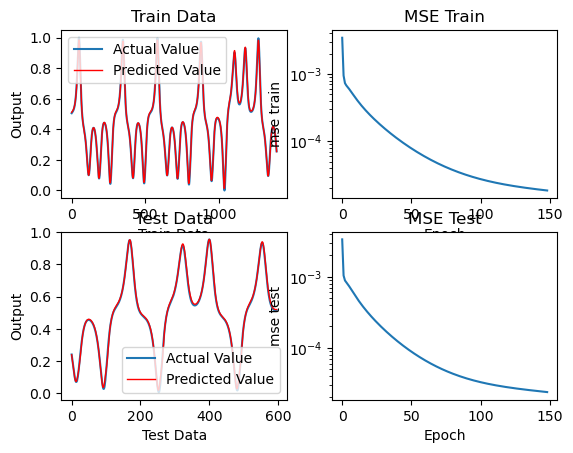

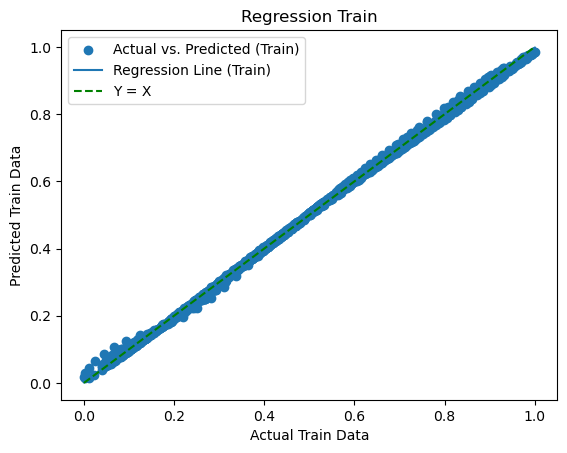

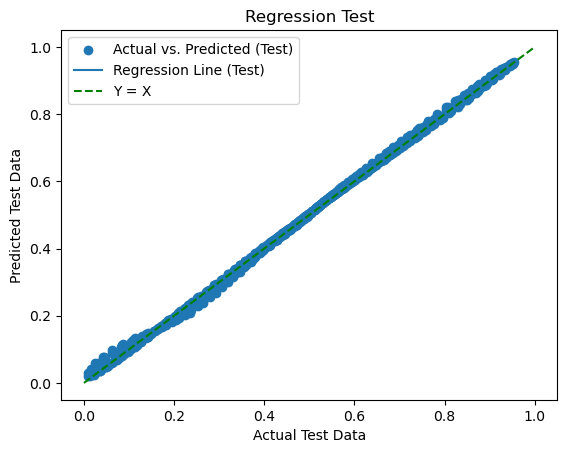

In [50]:
for t in range(epoch):
  error = np.zeros(num_train)
  r = np.zeros(num_train)
  for i in range(num_train):
    #Feed Forward
    input_data = data[i, :5]                                # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
    net1 = np.dot(w1, input_data.T) + bi1                   # 100 * 1
    o1 = (1 - np.exp(-net1)) / (1 + np.exp(-net1))          # 100 * 1
    net2 = np.dot(w2, o1) + bi2                             # 20 * 1
    o2 = (1 - np.exp(-net2)) / (1 + np.exp(-net2))          # 20 * 1
    net3 = np.dot(w3, o2) + bi3                             # 1 * 1
    o3 = (1 - np.exp(-net3))/(1 + np.exp(-net3))            # 1 * 1
    net4 = np.dot(w4, o3) + bi4
    o4 = net4
    target = data[i, 5]
    error[i] = (target - o4) 
    r[i] = (k1+k2)*error[i] - k2*error[i-1]

    t1  = 2*np.exp(-net1)/(1+np.exp(-net1))**2
    A = np.diag(t1)

    t2 = 2*np.exp(-net2)/(1+np.exp(-net2))**2
    B = np.diag(t2)

    t3 = 2*np.exp(-net3)/(1+np.exp(-net3))**2
    C = np.diag(t3)
      

    #Back prppagetion
    w4  -= eta * (-2 *(k1+k2)* r[i] * o3 + 2*landa4 * w4)
    bi4 -= eta * -2*(k1+k2)*r[i]

    w3  -= (eta * -2 *(k1+k2)* r[i] * np.outer(np.dot(w4,  C), o2) + eta*2*landa3 * w3)
    bi3 -= eta * -2 *(k1+k2)* r[i] * np.dot(w4, C).reshape(n3)

    w2  -= (eta * -2 *(k1+k2)* r[i] * np.outer(np.dot(np.dot(w4, C), np.dot(w3,B)), o1) +  eta*2*landa2*w2)
    bi2 -= eta * -2 *(k1+k2)* r[i] * np.dot(np.dot(w4,C), np.dot(w3,B)).reshape(n2)

    w1  -= (eta * -2 *(k1+k2)* r[i] * np.outer(np.dot(np.dot(np.dot(w4,C), np.dot(w3,B)),np.dot(w2, A)), input_data) +  eta*2*landa1*w1)
    bi1 -= eta * -2 * (k1+k2)*r[i] * np.dot(np.dot(np.dot(w4,C), np.dot(w3,B)),np.dot(w2, A)).reshape(n1)

  error_square_train = np.zeros(num_train)
  output_data_train = np.zeros(num_train)
  for i in range(num_train):
    input_data = data[i, :5]                                # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
    net1 = np.dot(w1, input_data.T) + bi1                   # 100 * 1
    o1 = (1 - np.exp(-net1)) / (1 + np.exp(-net1))          # 100 * 1
    net2 = np.dot(w2, o1) + bi2                             # 20 * 1
    o2 = (1 - np.exp(-net2)) / (1 + np.exp(-net2))          # 20 * 1
    net3 = np.dot(w3, o2) + bi3                             # 1 * 1
    o3 = (1 - np.exp(-net3))/(1 + np.exp(-net3))            # 1 * 1
    net4 = np.dot(w4, o3) + bi4
    o4 = net4
    target = data[i, 5]
    output_data_train[i] = o4
    error[i] =  (target - o4)
    r[i] = (k1+k2)*error[i] - k2*error[i-1]
    error_square_train[i] = (r[i]) ** 2
  mse_train[t] = np.mean(error_square_train)

  error_square_test = np.zeros(num_test)
  output_data_test = np.zeros(num_test)
  for i in range(num_test):
    input_data = data[num_train + i, :5]                    # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
    net1 = np.dot(w1, input_data.T) + bi1                   # 100 * 1
    o1 = (1 - np.exp(-net1)) / (1 + np.exp(-net1))          # 100 * 1
    net2 = np.dot(w2, o1) + bi2                             # 20 * 1
    o2 = (1 - np.exp(-net2)) / (1 + np.exp(-net2))          # 20 * 1
    net3 = np.dot(w3, o2) + bi3                             # 1 * 1
    o3 = (1 - np.exp(-net3))/(1 + np.exp(-net3))            # 1 * 1
    net4 = np.dot(w4, o3) + bi4
    o4 = net4
    output_data_test[i] = o4
    target = data[num_train + i, 5]
    error[i] = (target - o4) 
    r[i] = (k1+k2)*error[i] - k2*error[i-1]
    error_square_train[i] = (r[i]) ** 2
 
  mse_test[t] = np.mean(error_square_train)

  plt.subplot(2, 2, 1)
  plt.cla()  # Clear the previous plot
  plt.plot(data[:num_train, 5], label="Actual Value")
  plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
  plt.legend()
  plt.title('Train Data')
  plt.xlabel('Train Data')
  plt.ylabel('Output')

  # The MSE train data plot
  plt.subplot(2, 2, 2)
  plt.cla()
  plt.semilogy(mse_train[:t])
  plt.title('MSE Train')
  plt.xlabel('Epoch')
  plt.ylabel('mse train')

    # The test data plot
  plt.subplot(2, 2, 3)
  plt.cla()
  plt.plot(data[num_train:num_data, 5], label="Actual Value")
  plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
  plt.legend()
  plt.title('Test Data')
  plt.xlabel('Test Data')
  plt.ylabel('Output')

    # MSE test data plot
  plt.subplot(2, 2, 4)
  plt.cla()
  plt.semilogy(mse_test[:t])
  plt.title('MSE Test')
  plt.xlabel('Epoch')
  plt.ylabel('mse test')

  display(plt.gcf())
  clear_output(wait=True)


def plot_regression_line(x, y, label):
  coefficients = np.polyfit(x, y, 1)
  polynomial = np.poly1d(coefficients)
  x_line = np.linspace(min(x), max(x), 100)
  y_line = polynomial(x_line)
  plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()


**initialize flexible and Emotional MLP**

In [79]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n0, n1, n2, n3, n4 = 5, 80, 30, 10, 1
eta = 0.001
epoch = 150


mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1
k1, k2 = 0.8, 0.2


#layer 1 information
np.random.seed(42)
w1 = np.random.randn(n1, n0)
bi1 = np.random.randn(n1)
alpha1 = np.random.randn(n1)
net1 = np.zeros(n1)
o1 = np.zeros(n1)


#layer 2 information
w2 = np.random.randn(n2, n1)
bi2 = np.random.randn(n2)
alpha2 = np.random.randn(n2)
net2 = np.zeros(n2)
o2 = np.zeros(n2)

#layer 3 information
w3 = np.random.randn(n3, n2)
bi3 = np.random.randn(n3)
alpha3 = np.random.randn(n3)
net3 = np.zeros(n3)
o3 = np.zeros(n3)

#layer 4 information
w4 = np.random.randn(n4, n3)
bi4 = np.random.randn(n4)
net4 = np.zeros(n4)
o4 = np.zeros(n4)

landa1 = 0.0005
landa2 = 0.0005
landa3 = 0.00025
landa4 = 0.00025

**implemention flexible and Emotional MLP**

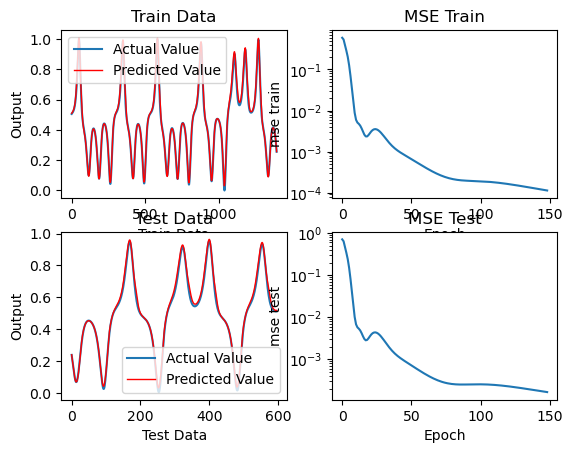

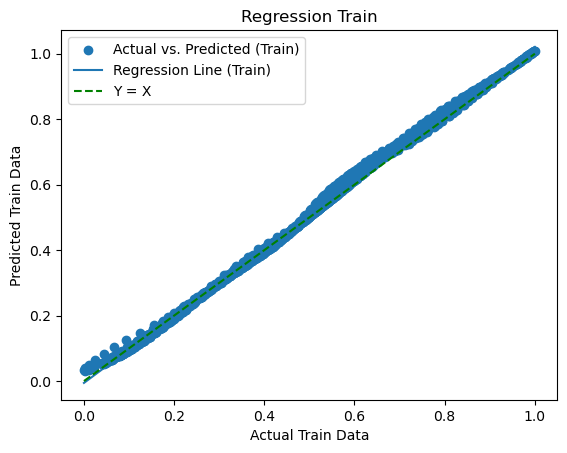

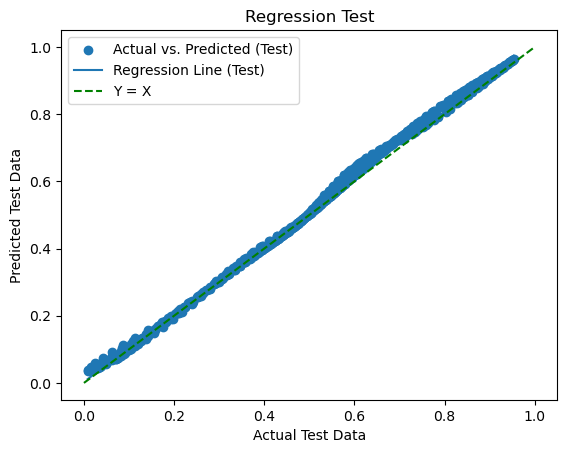

In [82]:
for t in range(epoch):
  error = np.zeros(num_train)
  r = np.zeros(num_train)
  for i in range(num_train):
    #Feed Forward
    input_data = data[i, :5]                                # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
    net1 = np.dot(w1, input_data.T) + bi1                   # 100 * 1
    o1 = (1 - np.exp(-net1*alpha1)) / (alpha1*(1 + np.exp(-net1*alpha1)))          # 100 * 1
    net2 = np.dot(w2, o1) + bi2                             # 20 * 1
    o2 = (1 - np.exp(-net2*alpha2)) / (alpha2*(1 + np.exp(-net2*alpha2)))          # 20 * 1
    net3 = np.dot(w3, o2) + bi3                             # 1 * 1
    o3 = (1 - np.exp(-net3*alpha3))/(alpha3*(1 + np.exp(-net3*alpha3)))            # 1 * 1
    net4 = np.dot(w4, o3) + bi4
    o4 = net4
    target = data[i, 5]
    error[i] = (target - o4) 
    r[i] = (k1+k2)*error[i] - k2*error[i-1]

    t1  = 2*np.exp(-net1*alpha1)/(1+np.exp(-net1*alpha1))**2
    A = np.diag(t1)

    t2 = 2*np.exp(-net2*alpha2)/((1+np.exp(-net2*alpha2))**2)
    B = np.diag(t2)

    t3 = 2*np.exp(-net3*alpha3)/((1+np.exp(-net3*alpha3))**2)
    C = np.diag(t3)

    t4 = ((2*alpha1*net1+np.exp(-alpha1*net1))*np.exp(-alpha1*net1)-1)/(alpha1*(1+np.exp(-alpha1*net1)))**2 
    D = np.diag(t4)
    #t5 = ((2*alpha2*net2+1)*np.exp(-alpha2*net2)-1)/(alpha2*(1+np.exp(-alpha2*net2)))**2  
    #E = np.diag(t5)
    t5 = ((2*alpha2*net2+np.exp(-alpha2*net2))*np.exp(-alpha2*net2)-1)/(alpha2*(1+np.exp(-alpha2*net2)))**2
    E = np.diag(t5)

    #t6 = ((2*alpha3*net3+1)*np.exp(-alpha3*net3)-1)/(alpha3*(1+np.exp(-alpha3*net3)))**2  
    #F = np.diag(t6)
    t6 = ((2*alpha3*net3+np.exp(-alpha3*net3))*np.exp(-alpha3*net3)-1)/(alpha3*(1+np.exp(-alpha3*net3)))**2  
    F = np.diag(t6)
      
      

    #Back prppagetion
    w4  -= eta * (-2 *(k1+k2)* r[i] * o3 + 2*landa4 * w4)
    bi4 -= eta * -2*(k1+k2)*r[i]

    w3  -= (eta * -2 *(k1+k2)* r[i] * np.outer(np.dot(w4,  C), o2) + eta*2*landa3 * w3)
    bi3 -= eta * -2 *(k1+k2)* r[i] * np.dot(w4, C).reshape(n3)
    alpha3 -= eta* -2* (k1+k2)*r[i]*np.dot(w4, F).reshape(n3)

    w2  -= (eta * -2 *(k1+k2)* r[i] * np.outer(np.dot(np.dot(w4, C), np.dot(w3,B)), o1) +  eta*2*landa2*w2)
    bi2 -= eta * -2 *(k1+k2)* r[i] * np.dot(np.dot(w4,C), np.dot(w3,B)).reshape(n2)
    alpha2 -= eta* -2* (k1+k2)*r[i]* np.dot(np.dot(w4, C), np.dot(w3, E)).reshape(n2)

    w1  -= (eta * -2 *(k1+k2)* r[i] * np.outer(np.dot(np.dot(np.dot(w4,C), np.dot(w3,B)),np.dot(w2, A)), input_data) +  eta*2*landa1*w1)
    bi1 -= eta * -2 * (k1+k2)*r[i] * np.dot(np.dot(np.dot(w4,C), np.dot(w3,B)),np.dot(w2, A)).reshape(n1)
    alpha1 -= eta* -2* (k1+k2)*r[i]* np.dot(np.dot(np.dot(w4, C), np.dot(w3, B)), np.dot(w2, D)).reshape(n1)

  error_square_train = np.zeros(num_train)
  output_data_train = np.zeros(num_train)
  for i in range(num_train):
    input_data = data[i, :5]                                # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
    net1 = np.dot(w1, input_data.T) + bi1                   # 100 * 1
    o1 = (1 - np.exp(-net1*alpha1)) / (alpha1*(1 + np.exp(-net1*alpha1)))          # 100 * 1
    net2 = np.dot(w2, o1) + bi2                             # 20 * 1
    o2 = (1 - np.exp(-net2*alpha2)) / (alpha2*(1 + np.exp(-net2*alpha2)))          # 20 * 1
    net3 = np.dot(w3, o2) + bi3                             # 1 * 1
    o3 = (1 - np.exp(-net3*alpha3))/ (alpha3*(1 + np.exp(-net3*alpha3)))            # 1 * 1
    net4 = np.dot(w4, o3) + bi4
    o4 = net4
    target = data[i, 5]
    output_data_train[i] = o4
    error[i] =  (target - o4)
    r[i] = (k1+k2)*error[i] - k2*error[i-1]
    error_square_train[i] = (r[i]) ** 2
  mse_train[t] = np.mean(error_square_train)

  error_square_test = np.zeros(num_test)
  output_data_test = np.zeros(num_test)
  for i in range(num_test):
    input_data = data[num_train + i, :5]                    # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
    net1 = np.dot(w1, input_data.T) + bi1                   # 100 * 1
    o1 = (1 - np.exp(-net1*alpha1)) / (alpha1*(1 + np.exp(-net1*alpha1)))          # 100 * 1
    net2 = np.dot(w2, o1) + bi2                             # 20 * 1
    o2 = (1 - np.exp(-net2*alpha2)) / (alpha2*(1 + np.exp(-net2*alpha2)))          # 20 * 1
    net3 = np.dot(w3, o2) + bi3                             # 1 * 1
    o3 = (1 - np.exp(-net3*alpha3))/ (alpha3*(1 + np.exp(-net3*alpha3)))            # 1 * 1
    net4 = np.dot(w4, o3) + bi4
    o4 = net4
    output_data_test[i] = o4
    target = data[num_train + i, 5]
    error[i] = (target - o4) 
    r[i] = (k1+k2)*error[i] - k2*error[i-1]
    error_square_train[i] = (r[i]) ** 2
 
  mse_test[t] = np.mean(error_square_train)

  plt.subplot(2, 2, 1)
  plt.cla()  # Clear the previous plot
  plt.plot(data[:num_train, 5], label="Actual Value")
  plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
  plt.legend()
  plt.title('Train Data')
  plt.xlabel('Train Data')
  plt.ylabel('Output')

  # The MSE train data plot
  plt.subplot(2, 2, 2)
  plt.cla()
  plt.semilogy(mse_train[:t])
  plt.title('MSE Train')
  plt.xlabel('Epoch')
  plt.ylabel('mse train')

    # The test data plot
  plt.subplot(2, 2, 3)
  plt.cla()
  plt.plot(data[num_train:num_data, 5], label="Actual Value")
  plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
  plt.legend()
  plt.title('Test Data')
  plt.xlabel('Test Data')
  plt.ylabel('Output')

    # MSE test data plot
  plt.subplot(2, 2, 4)
  plt.cla()
  plt.semilogy(mse_test[:t])
  plt.title('MSE Test')
  plt.xlabel('Epoch')
  plt.ylabel('mse test')

  display(plt.gcf())
  clear_output(wait=True)


def plot_regression_line(x, y, label):
  coefficients = np.polyfit(x, y, 1)
  polynomial = np.poly1d(coefficients)
  x_line = np.linspace(min(x), max(x), 100)
  y_line = polynomial(x_line)
  plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()


**initialize Emotional, flexible and Adaptive MLP**

In [147]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n0, n1, n2, n3, n4 = 5, 40, 20, 10, 1

landa = 0.00001
epoch = 100

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = 0, 0.001
k1, k2 = 0.6, 0.4


#layer 1 information
np.random.seed(42)
w1p = w1 = np.random.randn(n1, n0)
etaw1 = np.random.uniform(a,b,(n1,n0))
bi1 = np.random.randn(n1)
etabi1  =np.random.uniform(a,b,n1)
alpha1 = np.random.randn(n1)
etaa1 = np.random.uniform(a,b,n1)
net1 = np.zeros(n1)
o1p = o1 = np.zeros(n1)


#layer 2 information
w2p = w2 = np.random.randn(n2, n1)
etaw2 = np.random.uniform(a,b,(n2,n1))
bi2 = np.random.randn(n2)
etabi2 = np.random.uniform(a,b, n2)
alpha2 = np.random.randn(n2)
etaa2 = np.random.uniform(a,b,n2)
net2 = np.zeros(n2)
o2p = o2 = np.zeros(n2)

#layer 3 information
w3p =w3 = np.random.randn(n3, n2)
etaw3 = np.random.uniform(a,b, (n3,n2))
bi3 = np.random.randn(n3)
etabi3 = np.random.uniform(a,b, n3)
alpha3 = np.random.randn(n3)
etaa3 = np.random.uniform(a,b,n3)
net3 = np.zeros(n3)
o3=o3p = np.zeros(n3)

#layer 4 information
w4=w4p = np.random.randn(n4, n3)
etaw4 = np.random.uniform(a,b,(n4,n3))
bi4 = np.random.randn(n4)
etabi4 = np.random.uniform(a,b, n4)
net4 = np.zeros(n4)
o4 = np.zeros(n4)

landa1 = 0.0005
landa2 = 0.0005
landa3 = 0.00025
landa4 = 0.00025

Fp = F =np.diag(np.ones(n3))
Cp = C =np.diag(np.ones(n3))
Bp = B =np.diag(np.ones(n2))
Ep = E = np.diag(np.ones(n2))
Ap = A = np.diag(np.ones(n1))
Dp = D = np.diag(np.ones(n1))

**implemention Emotional, flexible and Adaptive MLP**

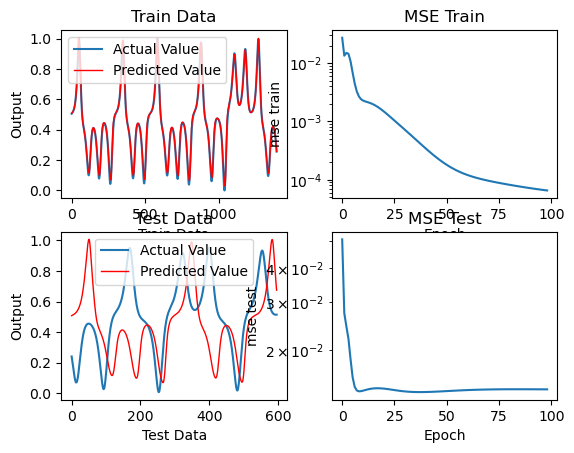

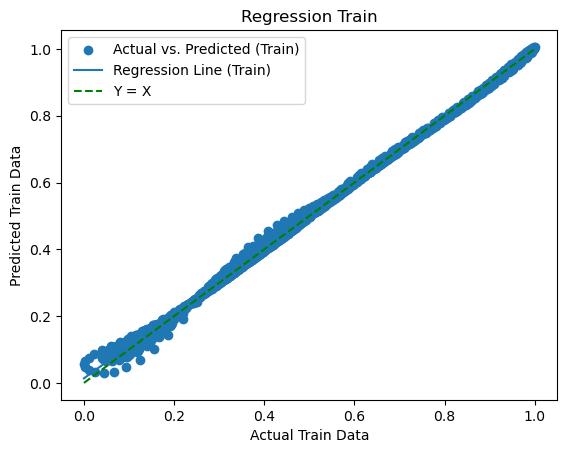

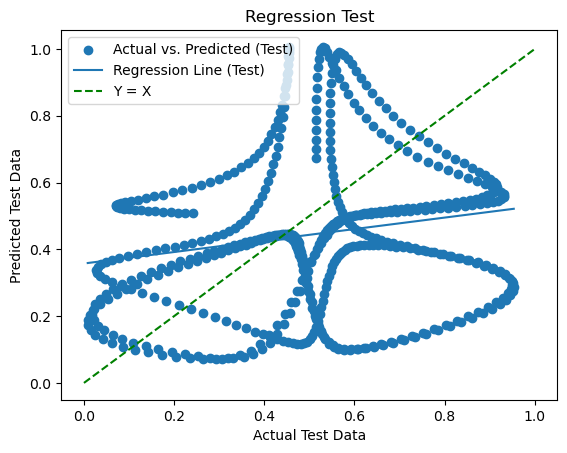

In [149]:
for t in range(epoch):
    error = np.zeros(num_train)
    r = np.zeros(num_train)
    for i in range(num_train):
        #Feed Forward
        input_data = data[i, :5]                                # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1                   # 100 * 1
        o1 = (1 - np.exp(-net1*alpha1)) / (alpha1*(1 + np.exp(-net1*alpha1)))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2                             # 20 * 1
        o2 = (1 - np.exp(-net2*alpha2)) / (alpha2*(1 + np.exp(-net2*alpha2)))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3                             # 1 * 1
        o3 = (1 - np.exp(-net3*alpha3))/(alpha3*(1 + np.exp(-net3*alpha3)))            # 1 * 1
        net4 = np.dot(w4, o3) + bi4
        o4 = net4
        target = data[i, 5]
        error[i] = (target - o4) 
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
        
        # f prim 
        t1  = 2*np.exp(-net1*alpha1)/(1+np.exp(-net1*alpha1))**2
        A = np.diag(t1)
        t2 = 2*np.exp(-net2*alpha2)/((1+np.exp(-net2*alpha2))**2)
        B = np.diag(t2)
        t3 = 2*np.exp(-net3*alpha3)/((1+np.exp(-net3*alpha3))**2)
        C = np.diag(t3)
        
        #fstar
        t4 = ((2*alpha1*net1+np.exp(-alpha1*net1))*np.exp(-alpha1*net1)-1)/(alpha1*(1+np.exp(-alpha1*net1)))**2  
        D = np.diag(t4)
        t5 = ((2*alpha2*net2+np.exp(-alpha2*net2))*np.exp(-alpha2*net2)-1)/(alpha2*(1+np.exp(-alpha2*net2)))**2  
        E = np.diag(t5)
        t6 = ((2*alpha3*net3+np.exp(-alpha3*net3))*np.exp(-alpha3*net3)-1)/(alpha3*(1+np.exp(-alpha3*net3)))**2  
        F = np.diag(t6)
        
        #Back prppagetion
        #layer4
        etaw4 -= landa*(-2*r[i]*(k1+k2)*o3)*(2*r[i-1]*(k1+k2)*o3p-2*landa4*w4p)
        w4    -= etaw4 * (-2 *(k1+k2)*r[i]*o3+2*landa4 * w4)
        etabi4 -=landa*-2*r[i]*(k1+k2)*2*r[i-1]*(k1+k2)
        bi4   -= etabi4 *-2*(k1+k2)*r[i]
        
        #layer3
        etaw3  -= landa*-2*(k1+k2)*r[i]*np.outer(np.dot(w4,C),o2)*(2*r[i-1]*(k1+k2)*np.outer(np.dot(w4p,Cp),o2p)-2*landa3*w3p)
        w3     -= (etaw3 * -2 *(k1+k2)* r[i] * np.outer(np.dot(w4,  C), o2) + etaw3*2*landa3 * w3)
        etabi3 -=(landa* -2*(k1+k2)*r[i]*np.dot(w4, C)*2*(k1+k2)*np.dot(w4p, Cp)).reshape(n3)
        bi3    -= etabi3 * -2 *(k1+k2)* r[i] * np.dot(w4, C).reshape(n3)
        etaa3  -=(landa*-2*r[i]*(k1+k2)*np.dot(w4, F)*2*r[i-1]*(k1+k2)*np.dot(w4p,Fp)).reshape(n3)
        alpha3 -= etaa3* -2* (k1+k2)*r[i]*np.dot(w4, F).reshape(n3)
        
        #layer2
        etaw2  -=landa*-2*(k1+k2)*r[i]*np.outer(np.dot(np.dot(np.dot(w4,C),w3),B), o1)*2*(k1+k2)*r[i-1]*(np.outer(np.dot(np.dot(np.dot(w4p,Cp),w3p),Bp), o1p)-2*landa2*w2p)
        w2     -= (etaw2 *-2 *(k1+k2)*r[i]*np.outer(np.dot(np.dot(w4, C), np.dot(w3,B)), o1) +  etaw2*2*landa2*w2)
        etabi2  -=(landa*-2*r[i]*(k1+k2)*np.dot(np.dot(w4, C),np.dot(w3,B))*2*(k1+k2)*r[i-1]*np.dot(np.dot(w4p, Cp),np.dot(w3p,Bp))).reshape(n2)
        bi2    -= etabi2 *-2*(k1+k2)*r[i]*np.dot(np.dot(w4,C), np.dot(w3,B)).reshape(n2)
        etaa2 -= (landa*-2*r[i]*(k1+k2)*np.dot(np.dot(w4,C),np.dot(w3,E))*2*r[i-1]*(k1+k2)*np.dot(np.dot(w4p,Cp), np.dot(w3p,Ep))).reshape(n2)
        alpha2 -= etaa2*-2*(k1+k2)*r[i]*np.dot(np.dot(w4, C), np.dot(w3, E)).reshape(n2) 
        
        #layer1
        etaw1  -=landa*-2*r[i]*(k1+k2)*np.outer(np.dot(np.dot(np.dot(w4,C),np.dot(w3,B)),np.dot(w2,A)), input_data)*2*r[i-1]*(k1+k2)*(np.outer(np.dot(np.dot(np.dot(w4p,Cp),np.dot(w3p,Bp)),np.dot(w2p,Ap)), input_data)-2*landa1*w1p)
        w1     -= (etaw1*-2*(k1+k2)*r[i]*np.outer(np.dot(np.dot(np.dot(w4,C), np.dot(w3,B)),np.dot(w2, A)), input_data)+ etaw1*2*landa1*w1)
        etabi1 -=(landa*-2*r[i]*(k1+k2)*np.dot(np.dot(np.dot(w4,C), np.dot(w3,B)),np.dot(w2,A))*2*r[i-1]*(k1+k2)*np.dot(np.dot(np.dot(w4p,Cp), np.dot(w3p,Bp)),np.dot(w2p,Ap))).reshape(n1)
        bi1    -= etabi1*-2*(k1+k2)*r[i]*np.dot(np.dot(np.dot(w4,C), np.dot(w3,B)),np.dot(w2, A)).reshape(n1)
        etaa1  -=(landa*-2*r[i]*(k1+k2)*np.dot(np.dot(np.dot(w4,C),np.dot(w3,B)),np.dot(w2,D))*2*r[i-1]*(k1+k2)*np.dot(np.dot(np.dot(w4p,Cp),np.dot(w3p,Bp)),np.dot(w2p,Dp))).reshape(n1)
        alpha1 -= etaa1*-2*(k1+k2)*r[i]*np.dot(np.dot(np.dot(w4,C),np.dot(w3, B)),np.dot(w2, D)).reshape(n1)

          
        w4p = w4
        o3p = o3
        w3p = w3
        o2p = o2
        Cp = C
        Fp = F
        w2p = w2
        Bp = B
        o1p = o1
        w2p = w2
        Ep = E
        w1p = w1
        Ap =A

    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros(num_train)
    for i in range(num_train):
        input_data = data[i, :5]                                # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1                   # 100 * 1
        o1 = (1 - np.exp(-net1*alpha1)) / (alpha1*(1 + np.exp(-net1*alpha1)))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2                             # 20 * 1
        o2 = (1 - np.exp(-net2*alpha2)) / (alpha2*(1 + np.exp(-net2*alpha2)))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3                             # 1 * 1
        o3 = (1 - np.exp(-net3*alpha3))/(alpha3*(1 + np.exp(-net3*alpha3)))            # 1 * 1
        net4 = np.dot(w4, o3) + bi4
        o4 = net4
        target = data[i, 5]
        output_data_train[i] = o4
        error[i] =  (target - o4)
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
        error_square_train[i] = (r[i]) ** 2
    mse_train[t] = np.mean(error_square_train)

    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros(num_test)
    for i in range(num_test):
        input_data = data[i, :5]                                # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1                   # 100 * 1
        o1 = (1 - np.exp(-net1*alpha1)) / (alpha1*(1 + np.exp(-net1*alpha1)))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2                             # 20 * 1
        o2 = (1 - np.exp(-net2*alpha2)) / (alpha2*(1 + np.exp(-net2*alpha2)))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3                             # 1 * 1
        o3 = (1 - np.exp(-net3*alpha3))/(alpha3*(1 + np.exp(-net3*alpha3)))            # 1 * 1
        net4 = np.dot(w4, o3) + bi4
        o4 = net4
        output_data_test[i] = o4
        target = data[num_train + i, 5]
        error[i] = (target - o4) 
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
        error_square_train[i] = (r[i]) ** 2
 
    mse_test[t] = np.mean(error_square_train)

    plt.subplot(2, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(data[:num_train, 5], label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')

    #The MSE train data plot
    plt.subplot(2, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')

    # The test data plot
    plt.subplot(2, 2, 3)
    plt.cla()
    plt.plot(data[num_train:num_data, 5], label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')

    # MSE test data plot
    plt.subplot(2, 2, 4)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')

    display(plt.gcf())
    clear_output(wait=True)


def plot_regression_line(x, y, label):
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    x_line = np.linspace(min(x), max(x), 100)
    y_line = polynomial(x_line)
    plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()


**Classification**

**Iris Dataste**

In [1]:
import numpy as np
import pandas as pd 
df = pd.read_excel("C:/Users/ISD/Python_ali/ANNKNT/classification/classification-iris.xlsx")
data_I = df.to_numpy()

**Preparing Dataset**

In [3]:
import matplotlib.pyplot as plt
from sklearn import metrics
np.random.seed(42)
data = data_I

input = data_I[:, :4]
output = data_I[:, 4]


def normalizeData(input):
  for ii in range(4):
      input[:, ii] = (input[:, ii] - np.min(input[:, ii])) / (np.max(input[:, ii]) - np.min(input[:, ii]))
  return input
input = normalizeData(input)


unique_values = np.unique(output)
value_to_index = {value: idx for idx, value in enumerate(unique_values)}
output= np.eye(len(unique_values))[np.vectorize(value_to_index.get)(output)]

num_data = len(data_I)
num_train = round(num_data * 0.7)
num_test = num_data - num_train

all_indices = set(range(num_data))
selected = np.random.choice(num_data, size=num_train, replace=False)
non_selected= list(all_indices - set(selected))


input_train = input[selected]
output_train = output[selected]

input_test = input[non_selected]
output_test = output[non_selected]


**initialize conventional MLP**

In [273]:
n0, n1, n2, n3, n4 = input.shape[1], 80, 30, 10, 3
eta = 0.001
epoch = 60

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1

#layer 1 information
np.random.seed(42)
w1 = np.random.randn(n1, n0)
bi1 = np.random.randn(n1)
alpha1 = np.random.randn(n1)
net1 = np.zeros(n1)
o1 = np.zeros(n1)


#layer 2 information
w2 = np.random.randn(n2, n1)
bi2 = np.random.randn(n2)
alpha2 = np.random.randn(n2)
net2 = np.zeros(n2)
o2 = np.zeros(n2)

#layer 3 information
w3 = np.random.randn(n3, n2)
bi3 = np.random.randn(n3)
alpha3 = np.random.randn(n3)
net3 = np.zeros(n3)
o3 = np.zeros(n3)

#layer 4 information
w4 = np.random.randn(n4, n3)
bi4 = np.random.randn(n4)
net4 = np.zeros(n4)
o4 = np.zeros(n4)

landa1 = 0.0005
landa2 = 0.0005
landa3 = 0.00025
landa4 = 0.00025

def softmax(a):
  e = np.exp(a)
  return e/e.sum()

**implemention convetional MLP**

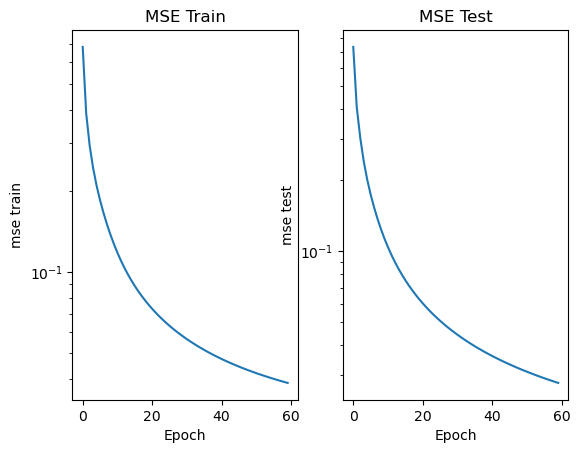

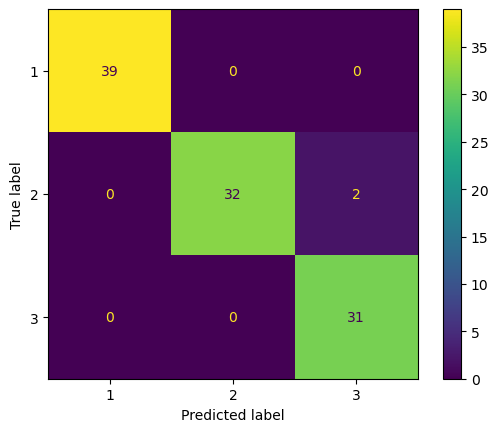

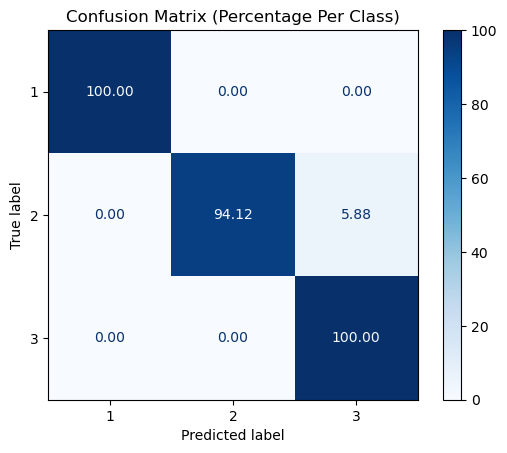

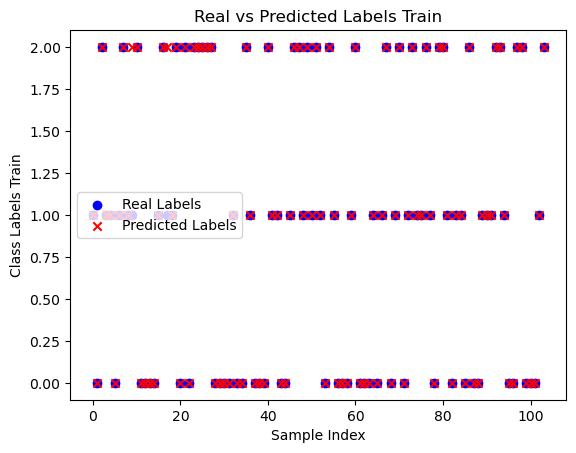

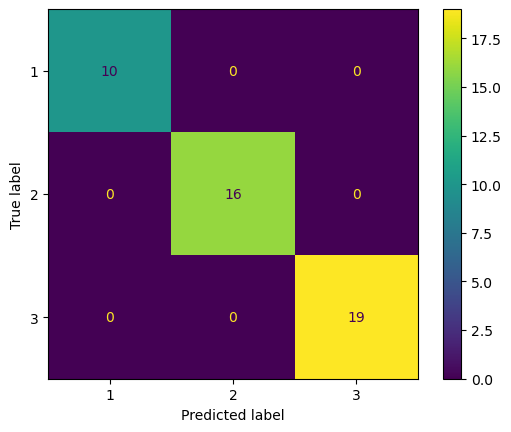

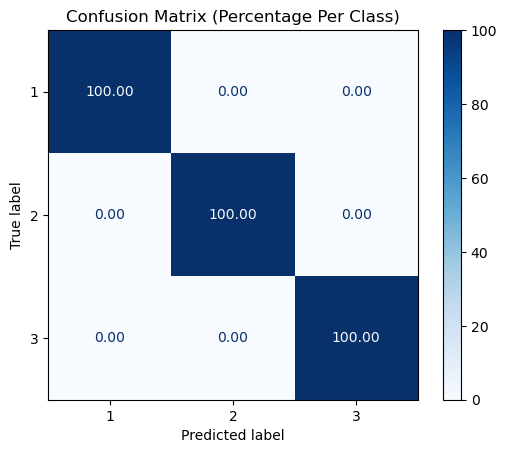

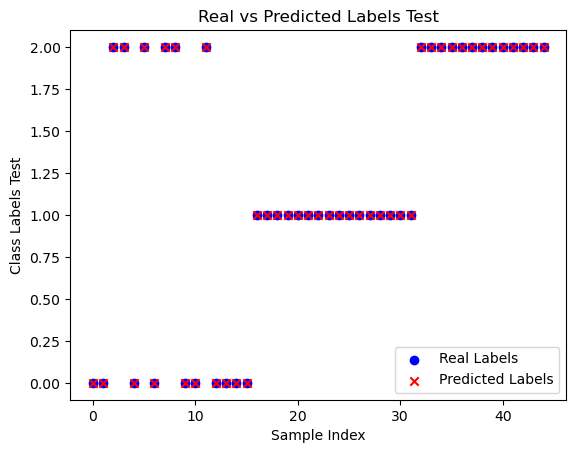

In [276]:
for t in range(epoch):
    error = np.zeros((num_train,3))

    for i in range(num_train):
        input_data = input_train[i, :]              # 1*22    W1 = 100*22, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = (1 - np.exp(-net1))  / (1 + np.exp(-net1))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = (1 - np.exp(-net2)) / (1 + np.exp(-net2))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 2 * 1
        o3 = (1 - np.exp(-net3)) / (1 + np.exp(-net3))
        net4 = np.dot(w4,o3) + bi4
        o4 = softmax(net4)                    # 1 * 1
        target = output_train[i, :]
        error[i] = -target*np.log(o4)
        
        t1  = 2*np.exp(-net1)/(1+np.exp(-net1))**2
        A = np.diag(t1)

        t2 = 2*np.exp(-net2)/(1+np.exp(-net2))**2
        B = np.diag(t2)
        t3 = 2*np.exp(-net3)/(1+np.exp(-net3))**2
        C = np.diag(t3)
        
        #Back prppagetion
        w4  -= eta * (-1*np.outer((target-o4), o3) + 2*landa4 * w4)
        bi4 -= eta * -1*(target - o4)

        w3  -= (eta * -1*np.outer(np.dot(np.dot((target - o4), w4), C), o2) + eta*2*landa3 * w3)
        bi3 -= eta *-1*np.dot(np.dot((target - o4), w4), C).reshape(n3)

        w2  -= (eta * -1*np.outer(np.dot(np.dot(np.dot((target - o4), w4), np.dot(C, w3)), B), o1) +  eta*2*landa2*w2)
        bi2 -= eta * -1*np.dot(np.dot(np.dot((target - o4), w4), np.dot(C, w3)), B).reshape(n2)

        w1  -= (eta * -1*np.outer(np.dot(np.dot(np.dot(np.dot((target - o4), w4), np.dot(C, w3)), np.dot(B, w2)), A), input_data) +  eta*2*landa1*w1)
        bi1 -= eta * -1*np.dot(np.dot(np.dot(np.dot((target - o4), w4), np.dot(C, w3)), np.dot(B, w2)), A).reshape(n1)

    error_square_train = np.zeros((num_train,n4))
    output_data_train = np.zeros((num_train,n4))
    for i in range(num_train):
        input_data = input_train[i, :]
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = (1 - np.exp(-net1))  / (1 + np.exp(-net1))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = (1 - np.exp(-net2)) / (1 + np.exp(-net2))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 2 * 1
        o3 = (1 - np.exp(-net3)) / (1 + np.exp(-net3))
        net4 = np.dot(w4,o3) + bi4
        o4 = softmax(net4) 
        target = output_train[i, :]
        output_data_train[i, :] = o4
        error_square_train[i] = -target*np.log(o4)

    mse_train[t] = np.mean(error_square_train)

    error_square_test = np.zeros((num_test,n4))
    output_data_test = np.zeros((num_test, n4))
    for i in range(num_test):
        input_data = input_test[ i, :]
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = (1 - np.exp(-net1))  / (1 + np.exp(-net1))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = (1 - np.exp(-net2)) / (1 + np.exp(-net2))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 2 * 1
        o3 = (1 - np.exp(-net3)) / (1 + np.exp(-net3))
        net4 = np.dot(w4,o3) + bi4
        o4 = softmax(net4) 
        target = output_test[i, :]
        output_data_test[i, :] = o4
        error_square_test[i] = -target*np.log(o4)

    mse_test[t] = np.mean(error_square_test)

plt.subplot(1, 2, 1)
plt.cla()
plt.semilogy(mse_train)
plt.title('MSE Train')
plt.xlabel('Epoch')
plt.ylabel('mse train')


# MSE test data plot
plt.subplot(1, 2, 2)
plt.cla()
plt.semilogy(mse_test)
plt.title('MSE Test')
plt.xlabel('Epoch')
plt.ylabel('mse test')

#plot confusion matrix for train data
actual =np.argmax(output_train, 1)
predicted = np.argmax(output_data_train, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2, 3])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[1, 2, 3])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Train")
plt.title("Real vs Predicted Labels Train")
plt.legend()
plt.show()

#plot confusion matrix for test data
actual =np.argmax(output_test, 1)
predicted = np.argmax(output_data_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2, 3])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[1, 2, 3])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Test")
plt.title("Real vs Predicted Labels Test")
plt.legend()
plt.show()


**initialize Emotiomna MLP**

In [54]:
n0, n1, n2, n3, n4 = input.shape[1], 80, 30, 10, 3
eta = 0.001
epoch = 50

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1
k1, k2 = 0.6, 0.4

#layer 1 information
np.random.seed(42)
w1 = np.random.randn(n1, n0)
bi1 = np.random.randn(n1)
alpha1 = np.random.randn(n1)
net1 = np.zeros(n1)
o1 = np.zeros(n1)


#layer 2 information
w2 = np.random.randn(n2, n1)
bi2 = np.random.randn(n2)
alpha2 = np.random.randn(n2)
net2 = np.zeros(n2)
o2 = np.zeros(n2)

#layer 3 information
w3 = np.random.randn(n3, n2)
bi3 = np.random.randn(n3)
alpha3 = np.random.randn(n3)
net3 = np.zeros(n3)
o3 = np.zeros(n3)

#layer 4 information
w4 = np.random.randn(n4, n3)
bi4 = np.random.randn(n4)
net4 = np.zeros(n4)
o4 = np.zeros(n4)

landa1 = 0.0005
landa2 = 0.0005
landa3 = 0.00025
landa4 = 0.00025

def softmax(a):
  e = np.exp(a)
  return e/e.sum()

**implemention Emotional MLP**

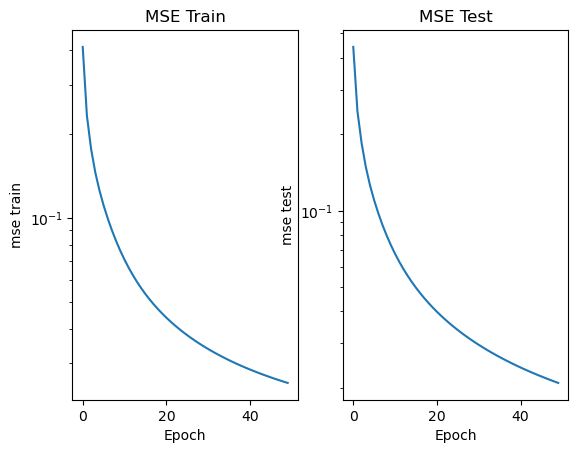

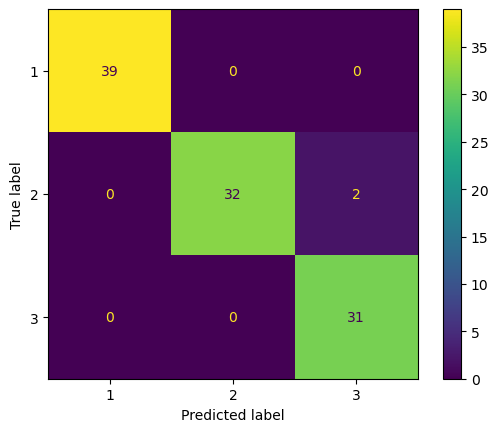

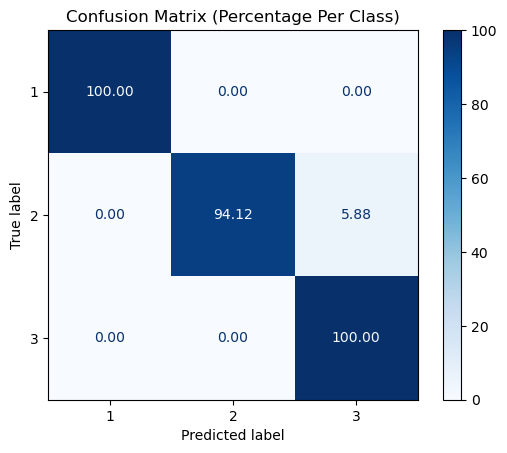

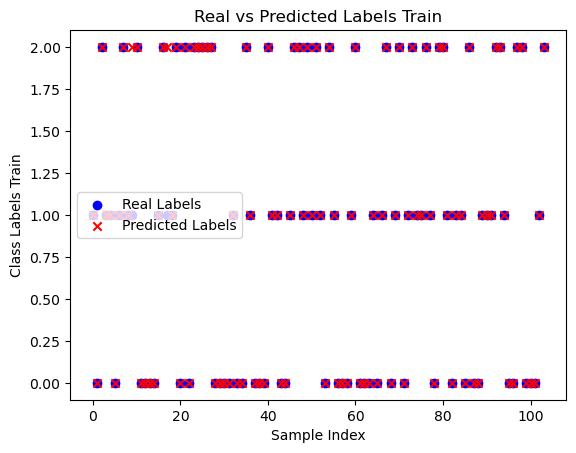

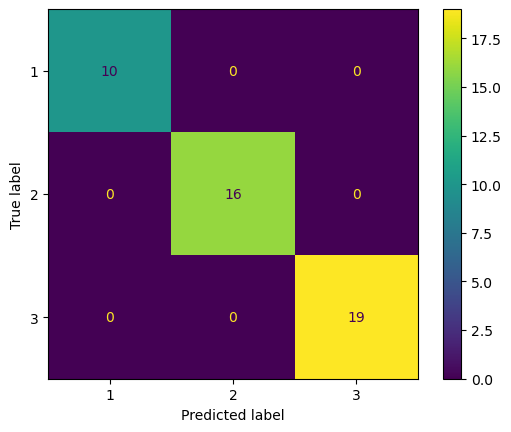

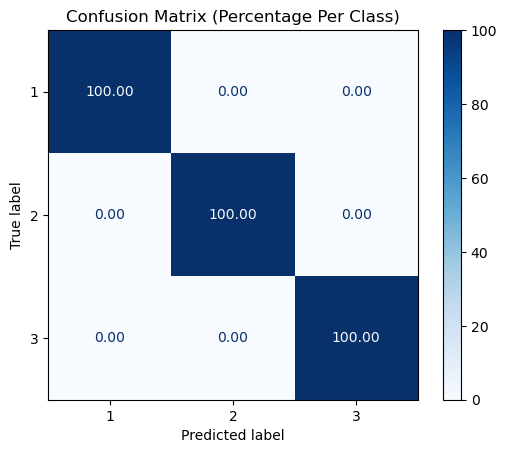

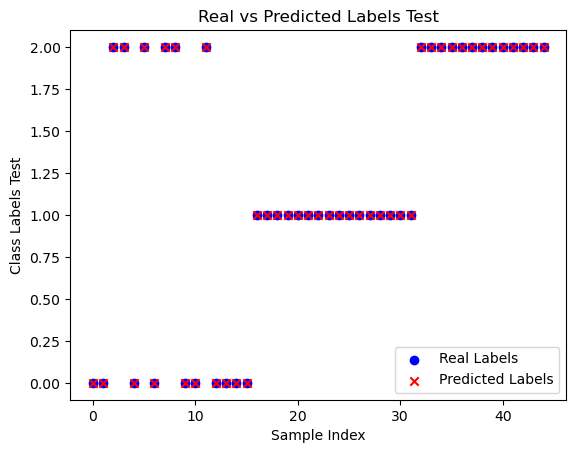

In [57]:
for t in range(epoch):
    error = np.zeros((num_train,3))
    r     = np.zeros((num_train,3))

    for i in range(num_train):
        input_data = input_train[i, :]              # 1*22    W1 = 100*22, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = (1 - np.exp(-net1))  / (1 + np.exp(-net1))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = (1 - np.exp(-net2)) / (1 + np.exp(-net2))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 2 * 1
        o3 = (1 - np.exp(-net3)) / (1 + np.exp(-net3))
        net4 = np.dot(w4,o3) + bi4
        o4 = softmax(net4)                    # 1 * 1
        target = output_train[i, :]
        error[i] = -target*np.log(o4)
        r[i] = (k1+k2)*error[i] -k2*error[i-1]
        
        t1  = 2*np.exp(-net1)/(1+np.exp(-net1))**2
        A = np.diag(t1)

        t2 = 2*np.exp(-net2)/(1+np.exp(-net2))**2
        B = np.diag(t2)
        t3 = 2*np.exp(-net3)/(1+np.exp(-net3))**2
        C = np.diag(t3)
        
        #Back prppagetion
        w4  -= eta * (-1*np.outer((target-o4), o3) + 2*landa4 * w4)
        bi4 -= eta * -1*(target - o4)

        w3  -= (eta * -1*(k1+k2)*np.outer(np.dot(np.dot((target - o4), w4), C), o2) + eta*2*landa3 * w3)
        bi3 -= eta *-1*(k1+k2)*np.dot(np.dot((target - o4), w4), C).reshape(n3)

        w2  -= (eta * -1*(k1+k2)*np.outer(np.dot(np.dot(np.dot((target - o4), w4), np.dot(C, w3)), B), o1) +  eta*2*landa2*w2)
        bi2 -= eta * -1*(k1+k2)*np.dot(np.dot(np.dot((target - o4), w4), np.dot(C, w3)), B).reshape(n2)

        w1  -= (eta * -1*(k1+k2)*np.outer(np.dot(np.dot(np.dot(np.dot((target - o4), w4), np.dot(C, w3)), np.dot(B, w2)), A), input_data) +  eta*2*landa1*w1)
        bi1 -= eta * -1*(k1+k2)*np.dot(np.dot(np.dot(np.dot((target - o4), w4), np.dot(C, w3)), np.dot(B, w2)), A).reshape(n1)

    error_square_train = np.zeros((num_train,n4))
    output_data_train = np.zeros((num_train,n4))
    for i in range(num_train):
        input_data = input_train[i, :]
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = (1 - np.exp(-net1))  / (1 + np.exp(-net1))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = (1 - np.exp(-net2)) / (1 + np.exp(-net2))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 2 * 1
        o3 = (1 - np.exp(-net3)) / (1 + np.exp(-net3))
        net4 = np.dot(w4,o3) + bi4
        o4 = softmax(net4) 
        target = output_train[i, :]
        output_data_train[i, :] = o4
        error[i] = -target*np.log(o4)
        r[i] = (k1+k2)*error[i] -k2*error[i-1]

    mse_train[t] = np.mean(r)

    error_square_test = np.zeros((num_test,n4))
    output_data_test = np.zeros((num_test, n4))
    for i in range(num_test):
        input_data = input_test[ i, :]
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = (1 - np.exp(-net1))  / (1 + np.exp(-net1))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = (1 - np.exp(-net2)) / (1 + np.exp(-net2))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 2 * 1
        o3 = (1 - np.exp(-net3)) / (1 + np.exp(-net3))
        net4 = np.dot(w4,o3) + bi4
        o4 = softmax(net4) 
        target = output_test[i, :]
        output_data_test[i, :] = o4
        error[i] = -target*np.log(o4)
        r[i] = (k1+k2)*error[i] -k2*error[i-1]

    mse_test[t] = np.mean(r)

plt.subplot(1, 2, 1)
plt.cla()
plt.semilogy(mse_train)
plt.title('MSE Train')
plt.xlabel('Epoch')
plt.ylabel('mse train')


# MSE test data plot
plt.subplot(1, 2, 2)
plt.cla()
plt.semilogy(mse_test)
plt.title('MSE Test')
plt.xlabel('Epoch')
plt.ylabel('mse test')

#plot confusion matrix for train data
actual =np.argmax(output_train, 1)
predicted = np.argmax(output_data_train, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2, 3])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[1, 2, 3])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Train")
plt.title("Real vs Predicted Labels Train")
plt.legend()
plt.show()

#plot confusion matrix for test data
actual =np.argmax(output_test, 1)
predicted = np.argmax(output_data_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2, 3])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[1, 2, 3])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Test")
plt.title("Real vs Predicted Labels Test")
plt.legend()
plt.show()


**initialize flexible and Emotional MLP**

In [94]:
n0, n1, n2, n3, n4 = input.shape[1], 80, 30, 10, 3
eta = 0.001
epoch = 100

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1
k1, k2 = 0.6, 0.4


#layer 1 information
np.random.seed(42)
w1 = np.random.randn(n1, n0)
bi1 = np.random.randn(n1)
alpha1 = np.random.randn(n1)
net1 = np.zeros(n1)
o1 = np.zeros(n1)


#layer 2 information
w2 = np.random.randn(n2, n1)
bi2 = np.random.randn(n2)
alpha2 = np.random.randn(n2)
net2 = np.zeros(n2)
o2 = np.zeros(n2)

#layer 3 information
w3 = np.random.randn(n3, n2)
bi3 = np.random.randn(n3)
alpha3 = np.random.randn(n3)
net3 = np.zeros(n3)
o3 = np.zeros(n3)

#layer 4 information
w4 = np.random.randn(n4, n3)
bi4 = np.random.randn(n4)
net4 = np.zeros(n4)
o4 = np.zeros(n4)

landa1 = 0.0005
landa2 = 0.0005
landa3 = 0.00025
landa4 = 0.00025

def softmax(a):
  e = np.exp(a)
  return e/e.sum()

**implemention flexible and Emotional MLP**

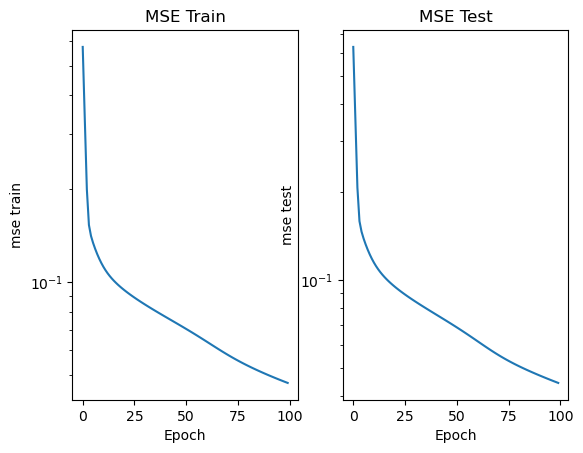

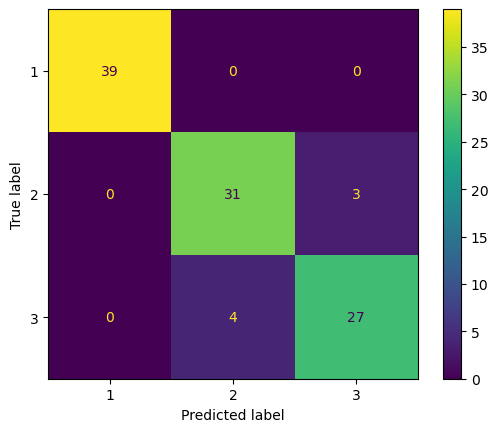

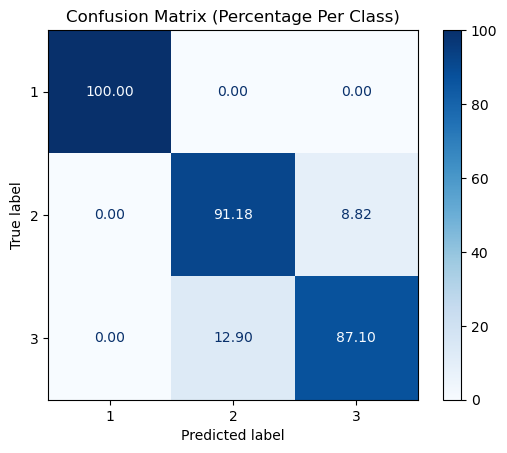

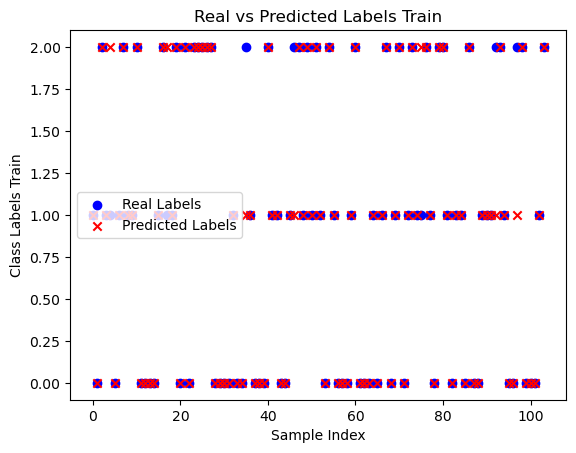

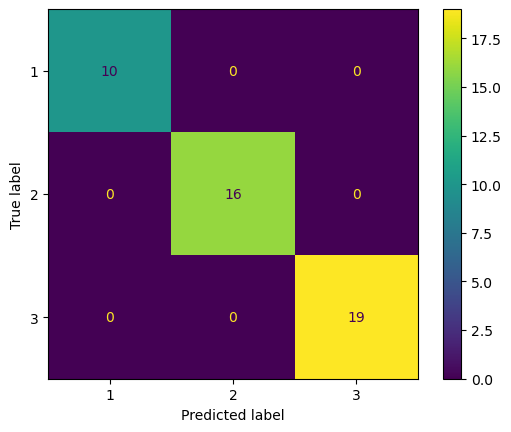

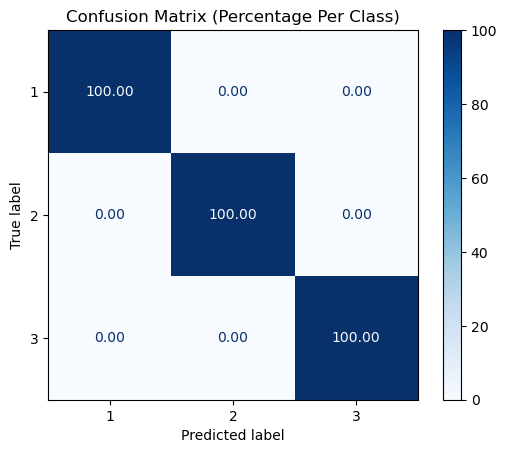

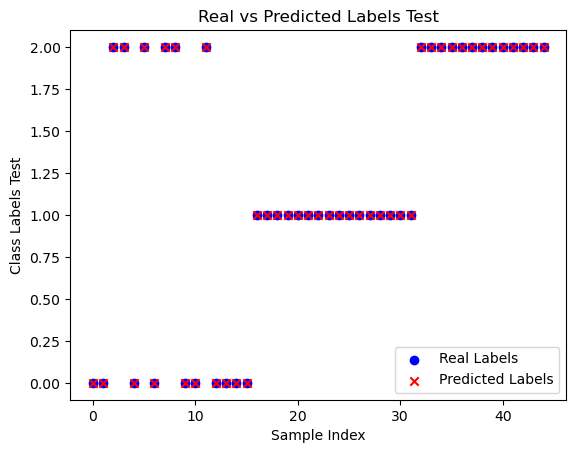

In [101]:
for t in range(epoch):
    error = np.zeros((num_train,3))
    r     = np.zeros((num_train,3))

    for i in range(num_train):
        input_data = input_train[i, :]              # 1*22    W1 = 100*22, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = (1 - np.exp(-net1*alpha1))  / (alpha1*(1 + np.exp(-net1*alpha1)))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = (1 - np.exp(-net2*alpha2))  / (alpha2*(1 + np.exp(-net2*alpha2)))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 2 * 1
        o3 = (1 - np.exp(-net3*alpha3))  / (alpha3*(1 + np.exp(-net3*alpha3)))
        net4 = np.dot(w4,o3) + bi4
        o4 = softmax(net4)                    # 1 * 1
        target = output_train[i, :]
        error[i] = -target*np.log(o4)
        r[i] = (k1+k2)*error[i] -k2*error[i-1]
        t1  = 2*np.exp(-net1*alpha1)/(1+np.exp(-net1*alpha1))**2
        A = np.diag(t1)

        t2 = 2*np.exp(-net2*alpha2)/((1+np.exp(-net2*alpha2))**2)
        B = np.diag(t2)

        t3 = 2*np.exp(-net3*alpha3)/((1+np.exp(-net3*alpha3))**2)
        C = np.diag(t3)

        t4 = ((2*alpha1*net1+np.exp(-alpha1*net1))*np.exp(-alpha1*net1)-1)/(alpha1*(1+np.exp(-alpha1*net1)))**2  
        D = np.diag(t4)
      
        t5 = ((2*alpha2*net2+np.exp(-alpha2*net2))*np.exp(-alpha2*net2)-1)/(alpha2*(1+np.exp(-alpha2*net2)))**2  
        E = np.diag(t5)

        t6 = ((2*alpha3*net3+np.exp(-alpha3*net3))*np.exp(-alpha3*net3)-1)/(alpha3*(1+np.exp(-alpha3*net3)))**2  
        F = np.diag(t6)
        
        #Back prppagetion
        w4  -= eta * (-1*(k1+k2)**np.outer((target-o4), o3) + 2*landa4 * w4)
        bi4 -= eta * -1*(target - o4)

        w3  -= (eta * -1*(k1+k2)*np.outer(np.dot(np.dot((target - o4), w4), C), o2) + eta*2*landa3 * w3)
        bi3 -= eta *-1 *(k1+k2)*np.dot(np.dot((target - o4), w4), C).reshape(n3)
        alpha3 -=eta*-1*(k1+k2)*np.dot(np.dot((target -o4), w4), F)

        w2  -= (eta * -1*(k1+k2)*np.outer(np.dot(np.dot(np.dot((target - o4), w4), np.dot(C, w3)), B), o1) +  eta*2*landa2*w2)
        bi2 -= eta * -1*(k1+k2)*np.dot(np.dot(np.dot((target - o4), w4), np.dot(C, w3)), B).reshape(n2)
        alpha2 -= eta * -1*(k1+k2)*np.dot(np.dot(np.dot((target - o4), w4), np.dot(C, w3)), B)

        w1  -= (eta * -1*(k1+k2)*np.outer(np.dot(np.dot(np.dot(np.dot((target - o4), w4), np.dot(C, w3)), np.dot(B, w2)), A), input_data) +  eta*2*landa1*w1)
        bi1 -= eta * -1*(k1+k2)*np.dot(np.dot(np.dot(np.dot((target - o4), w4), np.dot(C, w3)), np.dot(B, w2)), A).reshape(n1)
        alpha1 -= eta*-1*(k1+k2)*np.dot(np.dot(np.dot((target - o4), w4), np.dot(C, w3)),np.dot(B, np.dot(w2, D))).reshape(n1)

    error_square_train = np.zeros((num_train, n4))
    output_data_train = np.zeros((num_train,n4))
    for i in range(num_train):
        input_data = input_train[i, :]
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = (1 - np.exp(-net1*alpha1))  / (alpha1*(1 + np.exp(-net1*alpha1)))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = (1 - np.exp(-net2*alpha2))  / (alpha2*(1 + np.exp(-net2*alpha2)))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 2 * 1
        o3 = (1 - np.exp(-net3*alpha3))  / (alpha3*(1 + np.exp(-net3*alpha3)))
        net4 = np.dot(w4,o3) + bi4
        o4 = softmax(net4)     
        target = output_train[i, :]
        output_data_train[i, :] = o4
        error[i] = -target*np.log(o4)
        r[i] = (k1+k2)*error[i] -k2*error[i-1]
        

    mse_train[t] = np.mean(r)

    error_square_test = np.zeros((num_test, n4))
    output_data_test = np.zeros((num_test, n4))
    for i in range(num_test):
        input_data = input_test[ i, :]
        net1 = np.dot(w1, input_data.T) + bi1                                          # 100 * 1
        o1 = (1 - np.exp(-net1*alpha1))  / (alpha1*(1 + np.exp(-net1*alpha1)))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2                                                     # 20 * 1
        o2 = (1 - np.exp(-net2*alpha2))  / (alpha2*(1 + np.exp(-net2*alpha2)))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3                                                      # 2 * 1
        o3 = (1 - np.exp(-net3*alpha3))  / (alpha3*(1 + np.exp(-net3*alpha3)))
        net4 = np.dot(w4,o3) + bi4
        o4 = softmax(net4)    
        target = output_test[i, :]
        output_data_test[i, :] = o4
        error[i] = -target*np.log(o4)
        r[i] = (k1+k2)*error[i] -k2*error[i-1]
    mse_test[t] = np.mean(r)

plt.subplot(1, 2, 1)
plt.cla()
plt.semilogy(mse_train)
plt.title('MSE Train')
plt.xlabel('Epoch')
plt.ylabel('mse train')


# MSE test data plot
plt.subplot(1, 2, 2)
plt.cla()
plt.semilogy(mse_test)
plt.title('MSE Test')
plt.xlabel('Epoch')
plt.ylabel('mse test')

#plot confusion matrix for train data
actual =np.argmax(output_train, 1)
predicted = np.argmax(output_data_train, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2, 3])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[1, 2, 3])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Train")
plt.title("Real vs Predicted Labels Train")
plt.legend()
plt.show()

#plot confusion matrix for test data
actual =np.argmax(output_test, 1)
predicted = np.argmax(output_data_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2, 3])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[1, 2, 3])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Test")
plt.title("Real vs Predicted Labels Test")
plt.legend()
plt.show()


**initialize Emotional, flexible and Adaptive MLP**

In [15]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n0, n1, n2, n3, n4 =input.shape[1], 40, 20, 10, 3

landa = 0.00001
epoch = 1500

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = 0, 0.001
k1, k2 = 0.6, 0.4


#layer 1 information
np.random.seed(42)
w1p = w1 = np.random.randn(n1, n0)
etaw1 = np.random.uniform(a,b,(n1,n0))
bi1 = np.random.randn(n1)
etabi1  =np.random.uniform(a,b,n1)
alpha1 = np.random.randn(n1)
etaa1 = np.random.uniform(a,b,n1)
net1 = np.zeros(n1)
o1p = o1 = np.zeros(n1)


#layer 2 information
w2p = w2 = np.random.randn(n2, n1)
etaw2 = np.random.uniform(a,b,(n2,n1))
bi2 = np.random.randn(n2)
etabi2 = np.random.uniform(a,b, n2)
alpha2 = np.random.randn(n2)
etaa2 = np.random.uniform(a,b,n2)
net2 = np.zeros(n2)
o2p = o2 = np.zeros(n2)

#layer 3 information
w3p =w3 = np.random.randn(n3, n2)
etaw3 = np.random.uniform(a,b, (n3,n2))
bi3 = np.random.randn(n3)
etabi3 = np.random.uniform(a,b, n3)
alpha3 = np.random.randn(n3)
etaa3 = np.random.uniform(a,b,n3)
net3 = np.zeros(n3)
o3=o3p = np.zeros(n3)

#layer 4 information
w4=w4p = np.random.randn(n4, n3)
etaw4 = np.random.uniform(a,b,(n4,n3))
bi4 = np.random.randn(n4)
etabi4 = np.random.uniform(a,b, n4)
net4 = np.zeros(n4)
o4p = o4 = np.zeros(n4)

landa1 = 0.0005
landa2 = 0.0005
landa3 = 0.00025
landa4 = 0.00025

Fp = F =np.diag(np.ones(n3))
Cp = C =np.diag(np.ones(n3))
Bp = B =np.diag(np.ones(n2))
Ep = E = np.diag(np.ones(n2))
Ap = A = np.diag(np.ones(n1))
Dp = D = np.diag(np.ones(n1))

def softmax(a):
  e = np.exp(a)
  return e/e.sum()

**implemention Emotional, flexible and Adaptive MLP**

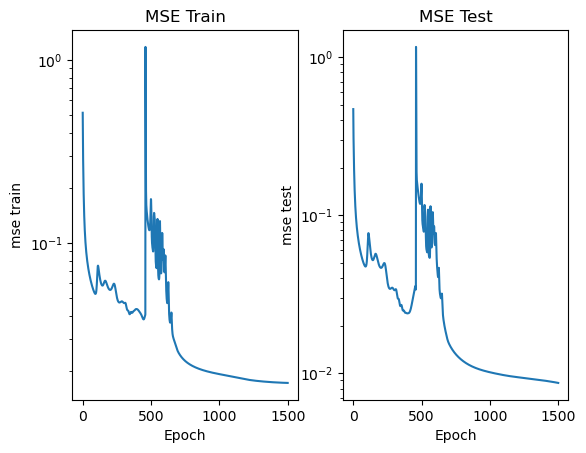

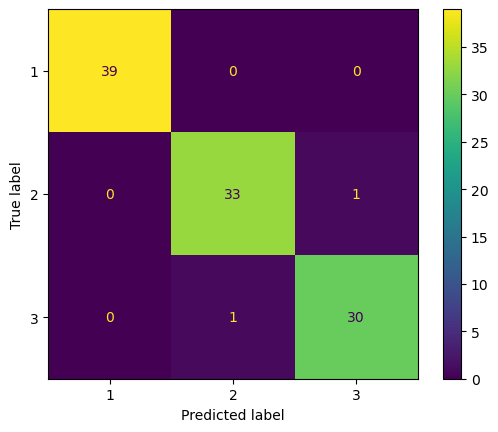

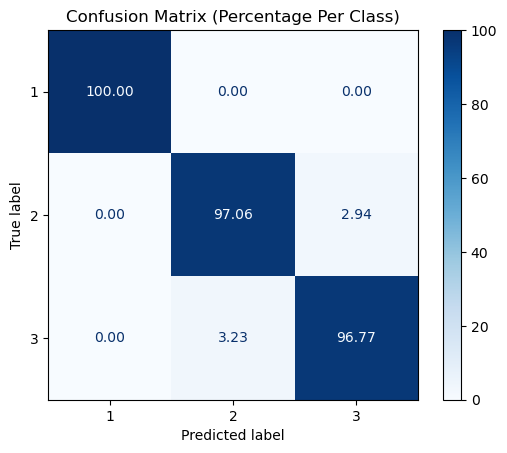

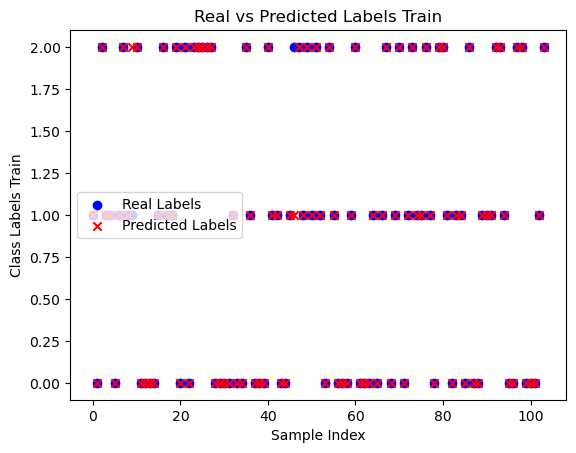

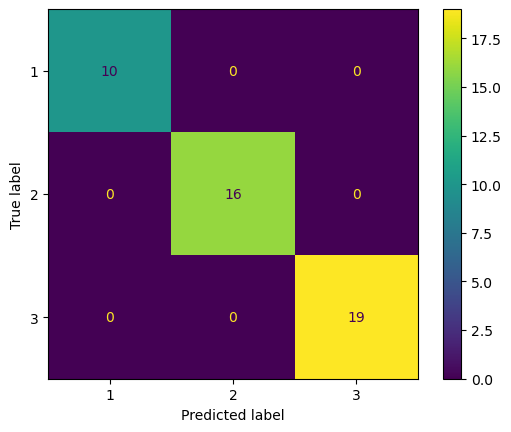

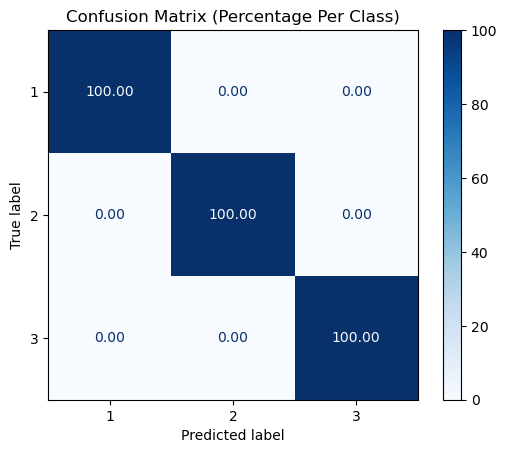

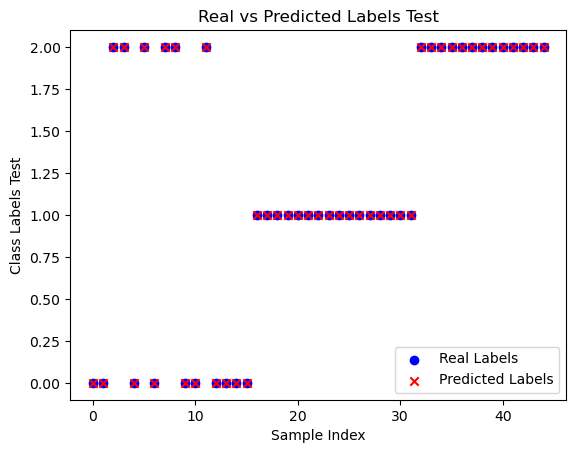

In [18]:
for t in range(epoch):
    error = np.zeros((num_train,3))
    r = np.zeros((num_train,3))
    for i in range(num_train):
        #Feed Forward
        input_data = input_train[i, :]                               # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1                   # 100 * 1
        o1 = (1 - np.exp(-net1*alpha1)) / (alpha1*(1 + np.exp(-net1*alpha1)))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2                             # 20 * 1
        o2 = (1 - np.exp(-net2*alpha2)) / (alpha2*(1 + np.exp(-net2*alpha2)))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3                             # 1 * 1
        o3 = (1 - np.exp(-net3*alpha3))/(alpha3*(1 + np.exp(-net3*alpha3)))            # 1 * 1
        net4 = np.dot(w4, o3) + bi4
        o4 = softmax(net4)
        target = output_train[i, :]
        error[i] = -target*np.log(o4)
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
        
        # f prim 
        t1  = 2*np.exp(-net1*alpha1)/(1+np.exp(-net1*alpha1))**2
        A = np.diag(t1)
        t2 = 2*np.exp(-net2*alpha2)/((1+np.exp(-net2*alpha2))**2)
        B = np.diag(t2)
        t3 = 2*np.exp(-net3*alpha3)/((1+np.exp(-net3*alpha3))**2)
        C = np.diag(t3)
        
        #fstar
        t4 = ((2*alpha1*net1+np.exp(-alpha1*net1))*np.exp(-alpha1*net1)-1)/(alpha1*(1+np.exp(-alpha1*net1)))**2  
        D = np.diag(t4)
        t5 = ((2*alpha2*net2+np.exp(-alpha2*net2))*np.exp(-alpha2*net2)-1)/(alpha2*(1+np.exp(-alpha2*net2)))**2  
        E = np.diag(t5)
        t6 = ((2*alpha3*net3+np.exp(-alpha3*net3))*np.exp(-alpha3*net3)-1)/(alpha3*(1+np.exp(-alpha3*net3)))**2  
        F = np.diag(t6)
        
        #Back prppagetion
        #layer4
        gradw4 = np.outer((output_train[i, :]-o4),o3)
        gradw4p = np.outer((output_train[i-1, :]-o4p),o3p)
        
        etaw4 -= landa*(gradw4*-1*(gradw4p+2*landa4*w4p))
        w4    -= -1*etaw4 * (gradw4+2*landa4*w4)
        
        etabi4 -=landa*(output_train[i, :]-o4)*-1*(output_train[i-1, :]-o4p)
        bi4   -= -1*etabi4 *(output_train[i, :]-o4)
    
        #layer3
        gradw3 = np.outer(np.dot(np.dot((output_train[i, :]-o4),w4),C),o2)
        gradw3p = np.outer(np.dot(np.dot((output_train[i-1, :]-o4p),w4p),Cp),o2p)
        
        etaw3  -= landa*gradw3*-1*(gradw3p+etaw3*2*landa3*w3p)
        w3     -= -1*(etaw3*gradw3 + etaw3*2*landa3*w3)
        
        gradbi3 = np.dot(np.dot((output_train[i, :]-o4),w4),C)
        gradbi3p = np.dot(np.dot((output_train[i-1, :]-o4p),w4p),Cp)
        
        etabi3 -=(landa* gradbi3*-1*gradbi3p).reshape(n3)
        bi3    -= -1*etabi3*gradbi3.reshape(n3)
        
        gradalpha3 = np.dot(np.dot((output_train[i, :]-o4),w4), F)
        gradalpha3p = np.dot(np.dot((output_train[i-1, :]-o4p),w4p),Fp)
        
        etaa3  -=(landa*gradalpha3*-1* gradalpha3p).reshape(n3)
        alpha3 -= -1*etaa3*gradalpha3.reshape(n3)
        
        #layer2
        gradw2 = np.outer(np.dot(np.dot((output_train[i, :]-o4),w4),np.dot(np.dot(C,w3),B)),o1)
        gradw2p = np.outer(np.dot(np.dot((output_train[i-1, :]-o4p),w4p),np.dot(np.dot(Cp,w3p),Bp)),o1p)
        
        etaw2  -=landa*gradw2*-1*(gradw2p+2*landa2*w2p)
        w2     -= -1*(etaw2*gradw2+ etaw2*2*landa2*w2)

        gradbi2 = np.dot(np.dot((output_train[i, :]-o4),w4),np.dot(np.dot(C,w3),B))
        gradbi2p = np.dot(np.dot((output_train[i-1, :]-o4p),w4p),np.dot(np.dot(Cp,w3p),Bp))
        
        etabi2  -=(landa*gradbi2*-1*gradbi2p).reshape(n2)
        bi2    -= -1*etabi2*gradbi2.reshape(n2)
        
        gradalpha2 = np.dot(np.dot(np.dot(np.dot((output_train[i, :]-o4),w4),C),w3),E)
        gradalpha2p = np.dot(np.dot(np.dot(np.dot((output_train[i-1, :]-o4p),w4p),Cp),w3p),Ep)
        
        etaa2 -= (landa* gradalpha2*-1* gradalpha2p).reshape(n2)
        alpha2 -= -1*etaa2* gradalpha2.reshape(n2) 
        
        #layer1
        gradw1 = np.outer(np.dot(np.dot(np.dot(np.dot(np.dot(np.dot((output_train[i,:]-o4),w4),C),w3),B),w2),A),input_train[i,:])
        gradw1p =np.outer(np.dot(np.dot(np.dot(np.dot(np.dot(np.dot((output_train[i-1,:]-o4p),w4p),Cp),w3p),Bp),w2p),Ap),input_train[i-1,:])
        
        etaw1  -=landa*gradw1*-1*(gradw1p+2*landa1*w1p)
        w1     -= -1*(etaw1*gradw1+ etaw1*2*landa1*w1)

        gradbi1 = np.dot(np.dot(np.dot(np.dot(np.dot(np.dot((output_train[i,:]-o4),w4),C),w3),B),w2),A)
        gradbi1p = np.dot(np.dot(np.dot(np.dot(np.dot(np.dot((output_train[i-1,:]-o4p),w4p),Cp),w3p),Bp),w2p),Ap)
        
        etabi1 -=(landa*gradbi1*-1*gradbi1p).reshape(n1)
        bi1    -= -1*(etabi1*gradbi1).reshape(n1)

        gradalpha1 = np.dot(np.dot(np.dot(np.dot(np.dot(np.dot((output_train[i,:]-o4),w4),C),w3),B),w2),D)
        gradalpha1p = np.dot(np.dot(np.dot(np.dot(np.dot(np.dot((output_train[i-1,:]-o4p),w4p),Cp),w3p),Bp),w2p),Dp)
        
        etaa1  -=(landa*gradalpha1*-1*gradalpha1p).reshape(n1)
        alpha1 -= -1*etaa1*gradalpha1p.reshape(n1)

        w4p = w4
        o3p = o3
        o4p = o4
        w3p = w3
        o2p = o2
        Cp = C
        Fp = F
        w2p = w2
        Bp = B
        o1p = o1
        w2p = w2
        Ep = E
        w1p = w1
        Ap =A
        Dp = D

    error_square_train = np.zeros((num_train,3))
    output_data_train = np.zeros((num_train,3))
    for i in range(num_train):
        input_data = input_train[i, :]                                # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1                   # 100 * 1
        o1 = (1 - np.exp(-net1*alpha1)) / (alpha1*(1 + np.exp(-net1*alpha1)))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2                             # 20 * 1
        o2 = (1 - np.exp(-net2*alpha2)) / (alpha2*(1 + np.exp(-net2*alpha2)))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3                             # 1 * 1
        o3 = (1 - np.exp(-net3*alpha3))/(alpha3*(1 + np.exp(-net3*alpha3)))            # 1 * 1
        net4 = np.dot(w4, o3) + bi4
        o4 = softmax(net4)
        target = output_train[i, :]
        output_data_train[i, :] = o4
        error[i] = -target*np.log(o4)
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
       
    mse_train[t] = np.mean(error)

    error_square_test = np.zeros((num_test,3))
    output_data_test = np.zeros((num_test,3))
    for i in range(num_test):
        input_data = input_test[i, :]                                # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1                   # 100 * 1
        o1 = (1 - np.exp(-net1*alpha1)) / (alpha1*(1 + np.exp(-net1*alpha1)))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2                             # 20 * 1
        o2 = (1 - np.exp(-net2*alpha2)) / (alpha2*(1 + np.exp(-net2*alpha2)))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3                             # 1 * 1
        o3 = (1 - np.exp(-net3*alpha3))/(alpha3*(1 + np.exp(-net3*alpha3)))            # 1 * 1
        net4 = np.dot(w4, o3) + bi4
        o4 = softmax(net4)
        target = output_test[i, :]
        output_data_test[i, :] = o4
        error[i] = -target*np.log(o4) 
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
 
    mse_test[t] = np.mean(error)

plt.subplot(1, 2, 1)
plt.cla()
plt.semilogy(mse_train)
plt.title('MSE Train')
plt.xlabel('Epoch')
plt.ylabel('mse train')


# MSE test data plot
plt.subplot(1, 2, 2)
plt.cla()
plt.semilogy(mse_test)
plt.title('MSE Test')
plt.xlabel('Epoch')
plt.ylabel('mse test')

#plot confusion matrix for train data
actual =np.argmax(output_train, 1)
predicted = np.argmax(output_data_train, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2, 3])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[1, 2, 3])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Train")
plt.title("Real vs Predicted Labels Train")
plt.legend()
plt.show()

#plot confusion matrix for test data
actual =np.argmax(output_test, 1)
predicted = np.argmax(output_data_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2, 3])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[1, 2, 3])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Test")
plt.title("Real vs Predicted Labels Test")
plt.legend()
plt.show()



**Wine Dataset**

In [1252]:
import numpy as np
import pandas as pd 
df = pd.read_excel("C:/Users/ISD/Python_ali/ANNKNT/classification/classification-wine.xlsx")
data_W = df.to_numpy()

**preparing Dataset**

In [1255]:
import matplotlib.pyplot as plt
from sklearn import metrics
np.random.seed(42)
data = data_W

input = data_W[:, :13]
output = data_W[:, 13]


def normalizeData(input):
  for ii in range(13):
      input[:, ii] = (input[:, ii] - np.min(input[:, ii]))/ (np.max(input[:, ii])-np.min(input[:, ii]))
  return input
input = normalizeData(input)


unique_values = np.unique(output)
value_to_index = {value: idx for idx, value in enumerate(unique_values)}
output= np.eye(len(unique_values))[np.vectorize(value_to_index.get)(output)]

num_data = len(data_W)
num_train = round(num_data * 0.7)
num_test = num_data - num_train

all_indices = set(range(num_data))
selected = np.random.choice(num_data, size=num_train, replace=False)
non_selected= list(all_indices - set(selected))


input_train = input[selected]
output_train = output[selected]

input_test = input[non_selected]
output_test = output[non_selected]


**initialize conventional MLP**

In [99]:
n0, n1, n2, n3, n4 = input.shape[1], 80, 30, 10, 3
eta = 0.001
epoch = 50

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1

#layer 1 information
np.random.seed(42)
w1 = np.random.randn(n1, n0)
bi1 = np.random.randn(n1)
alpha1 = np.random.randn(n1)
net1 = np.zeros(n1)
o1 = np.zeros(n1)


#layer 2 information
w2 = np.random.randn(n2, n1)
bi2 = np.random.randn(n2)
alpha2 = np.random.randn(n2)
net2 = np.zeros(n2)
o2 = np.zeros(n2)

#layer 3 information
w3 = np.random.randn(n3, n2)
bi3 = np.random.randn(n3)
alpha3 = np.random.randn(n3)
net3 = np.zeros(n3)
o3 = np.zeros(n3)

#layer 4 information
w4 = np.random.randn(n4, n3)
bi4 = np.random.randn(n4)
net4 = np.zeros(n4)
o4 = np.zeros(n4)

landa1 = 0.0005
landa2 = 0.0005
landa3 = 0.00025
landa4 = 0.00025

def softmax(a):
  e = np.exp(a)
  return e/e.sum()

**implemention conventional MLP**

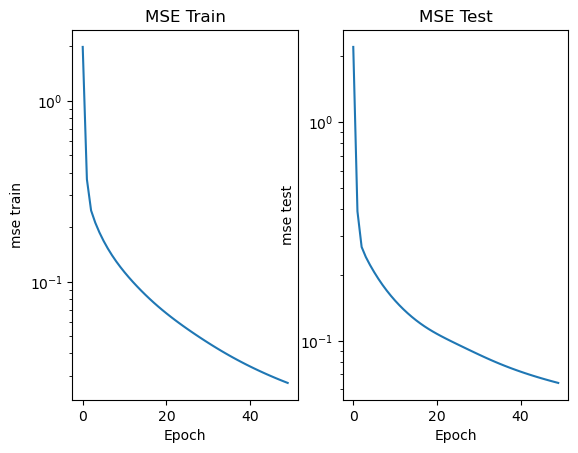

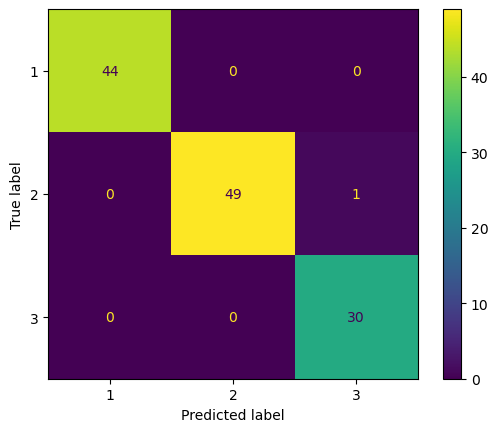

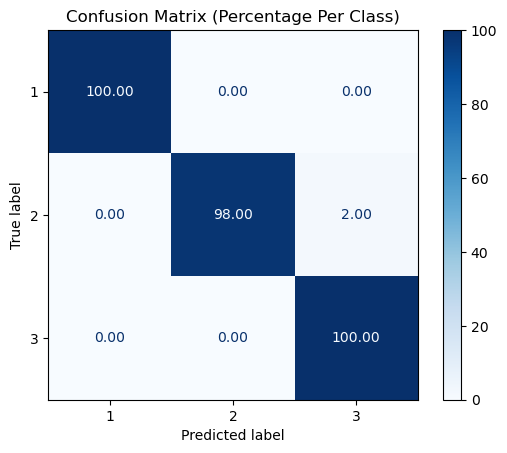

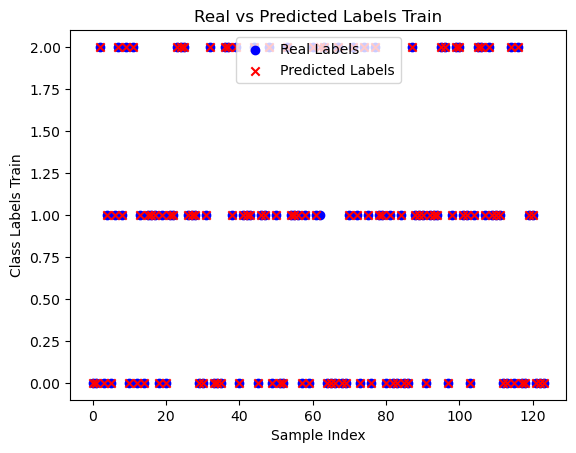

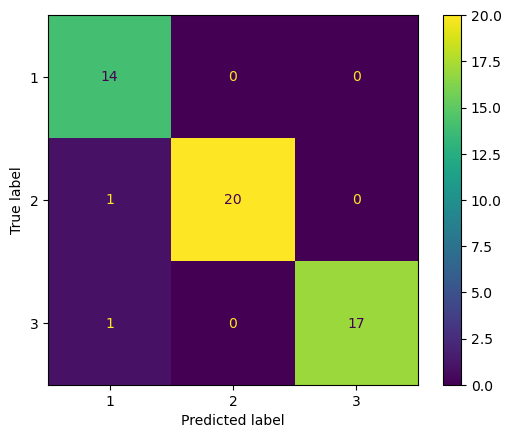

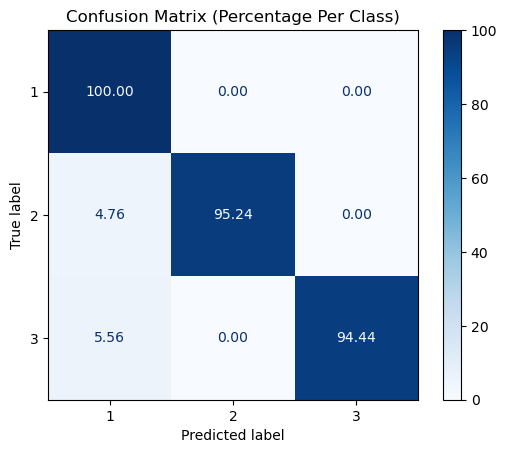

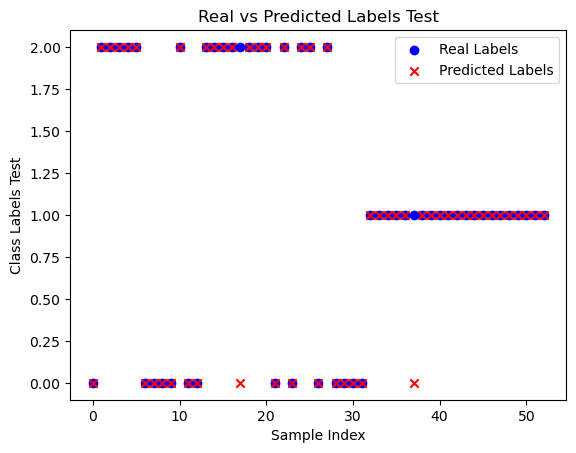

In [102]:
for t in range(epoch):
    error = np.zeros((num_train,3))
    for i in range(num_train):
        input_data = input_train[i, :]              # 1*22    W1 = 100*22, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = (1 - np.exp(-net1))  / (1 + np.exp(-net1))         # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = (1 - np.exp(-net2)) / (1 + np.exp(-net2))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 2 * 1
        o3 = (1 - np.exp(-net3)) / (1 + np.exp(-net3))
        net4 = np.dot(w4,o3) + bi4
        o4 = softmax(net4)                    # 1 * 1
        target = output_train[i, :]
        error[i] = -target*np.log(o4)
   
        t1  = 2*np.exp(-net1)/(1+np.exp(-net1))**2
        A = np.diag(t1)

        t2 = 2*np.exp(-net2)/(1+np.exp(-net2))**2
        B = np.diag(t2)
        t3 = 2*np.exp(-net3)/(1+np.exp(-net3))**2
        C = np.diag(t3)
        
        #Back prppagetion
        w4  -= eta * (-1*np.outer((target-o4), o3) + 2*landa4 * w4)
        bi4 -= eta * -1*(target - o4)

        w3  -= (eta * -1*np.outer(np.dot(np.dot((target - o4), w4), C), o2) + eta*2*landa3 * w3)
        bi3 -= eta *-1*np.dot(np.dot((target - o4), w4), C).reshape(n3)

        w2  -= (eta * -1*np.outer(np.dot(np.dot(np.dot((target - o4), w4), np.dot(C, w3)), B), o1) +  eta*2*landa2*w2)
        bi2 -= eta * -1*np.dot(np.dot(np.dot((target - o4), w4), np.dot(C, w3)), B).reshape(n2)

        w1  -= (eta * -1*np.outer(np.dot(np.dot(np.dot(np.dot((target - o4), w4), np.dot(C, w3)), np.dot(B, w2)), A), input_data) +  eta*2*landa1*w1)
        bi1 -= eta * -1*np.dot(np.dot(np.dot(np.dot((target - o4), w4), np.dot(C, w3)), np.dot(B, w2)), A).reshape(n1)

    error_square_train = np.zeros((num_train,n4))
    output_data_train = np.zeros((num_train,n4))
    for i in range(num_train):
        input_data = input_train[i, :]
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = (1 - np.exp(-net1))  / (1 + np.exp(-net1))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = (1 - np.exp(-net2)) / (1 + np.exp(-net2))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 2 * 1
        o3 = (1 - np.exp(-net3)) / (1 + np.exp(-net3))
        net4 = np.dot(w4,o3) + bi4
        o4 = softmax(net4) 
        target = output_train[i, :]
        output_data_train[i, :] = o4
        error_square_train[i] = -target*np.log(o4)

    mse_train[t] = np.mean(error_square_train)

    error_square_test = np.zeros((num_test,n4))
    output_data_test = np.zeros((num_test, n4))
    for i in range(num_test):
        input_data = input_test[ i, :]
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = (1 - np.exp(-net1))  / (1 + np.exp(-net1))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = (1 - np.exp(-net2)) / (1 + np.exp(-net2))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 2 * 1
        o3 = (1 - np.exp(-net3)) / (1 + np.exp(-net3))
        net4 = np.dot(w4,o3) + bi4
        o4 = softmax(net4) 
        target = output_test[i, :]
        output_data_test[i, :] = o4
        error_square_test[i] = -target*np.log(o4)

    mse_test[t] = np.mean(error_square_test)

plt.subplot(1, 2, 1)
plt.cla()
plt.semilogy(mse_train)
plt.title('MSE Train')
plt.xlabel('Epoch')
plt.ylabel('mse train')


# MSE test data plot
plt.subplot(1, 2, 2)
plt.cla()
plt.semilogy(mse_test)
plt.title('MSE Test')
plt.xlabel('Epoch')
plt.ylabel('mse test')

#plot confusion matrix for train data
actual =np.argmax(output_train, 1)
predicted = np.argmax(output_data_train, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2, 3])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[1, 2, 3])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Train")
plt.title("Real vs Predicted Labels Train")
plt.legend()
plt.show()

#plot confusion matrix for test data
actual =np.argmax(output_test, 1)
predicted = np.argmax(output_data_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2, 3])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[1, 2, 3])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Test")
plt.title("Real vs Predicted Labels Test")
plt.legend()
plt.show()

**initialize Emotional MLP**

In [104]:
n0, n1, n2, n3, n4 = input.shape[1], 80, 30, 10, 3
eta = 0.001
epoch = 50

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1
k1, k2 = 0.6, 0.4

#layer 1 information
np.random.seed(42)
w1 = np.random.randn(n1, n0)
bi1 = np.random.randn(n1)
alpha1 = np.random.randn(n1)
net1 = np.zeros(n1)
o1 = np.zeros(n1)


#layer 2 information
w2 = np.random.randn(n2, n1)
bi2 = np.random.randn(n2)
alpha2 = np.random.randn(n2)
net2 = np.zeros(n2)
o2 = np.zeros(n2)

#layer 3 information
w3 = np.random.randn(n3, n2)
bi3 = np.random.randn(n3)
alpha3 = np.random.randn(n3)
net3 = np.zeros(n3)
o3 = np.zeros(n3)

#layer 4 information
w4 = np.random.randn(n4, n3)
bi4 = np.random.randn(n4)
net4 = np.zeros(n4)
o4 = np.zeros(n4)

landa1 = 0.0005
landa2 = 0.0005
landa3 = 0.00025
landa4 = 0.00025

def softmax(a):
  e = np.exp(a)
  return e/e.sum()

**implemention Emotional MLP**

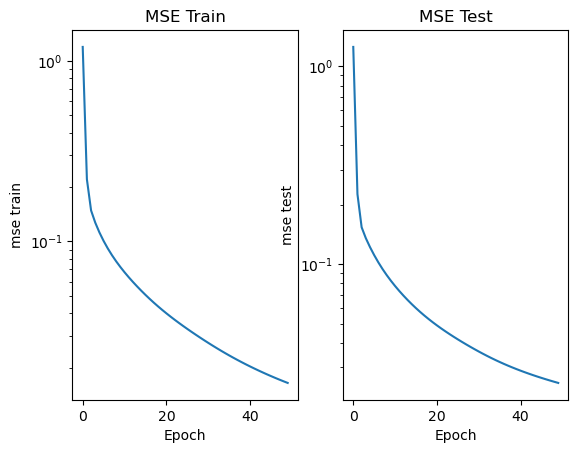

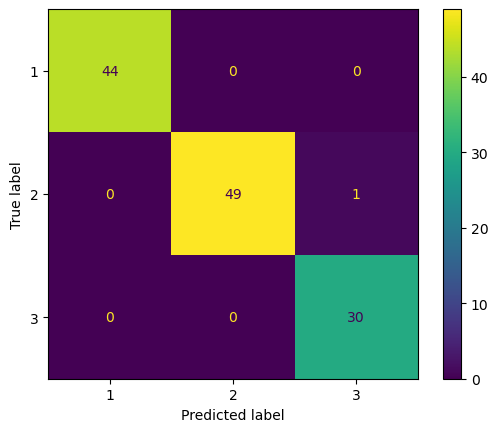

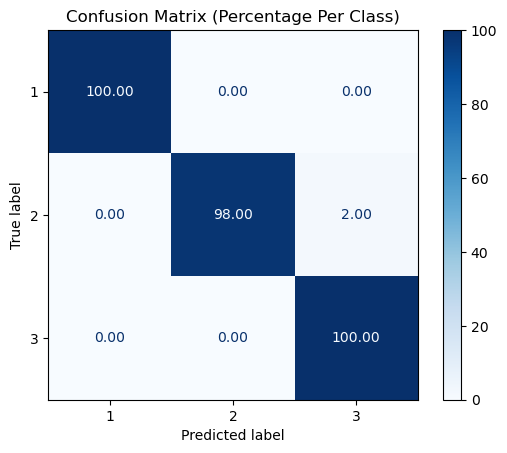

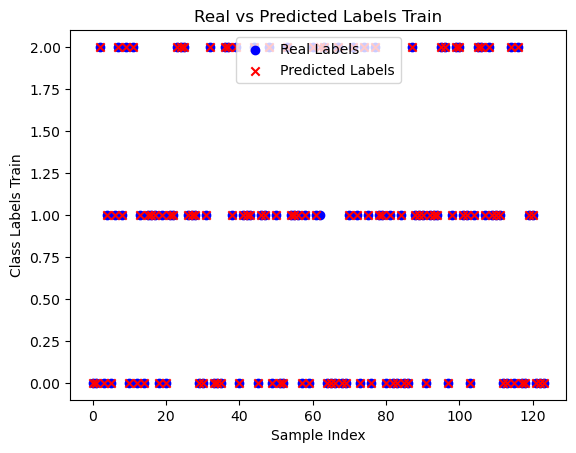

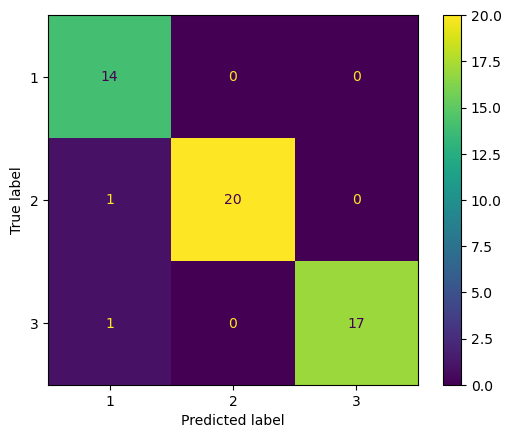

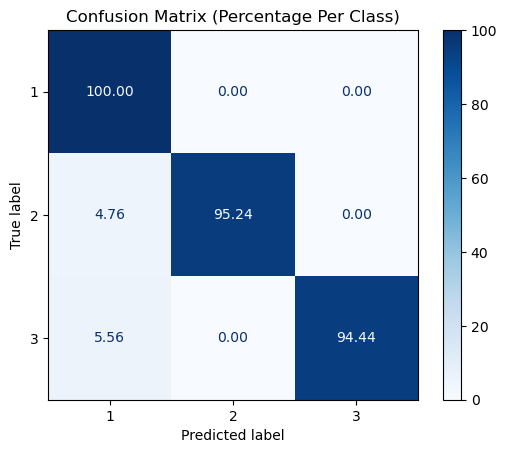

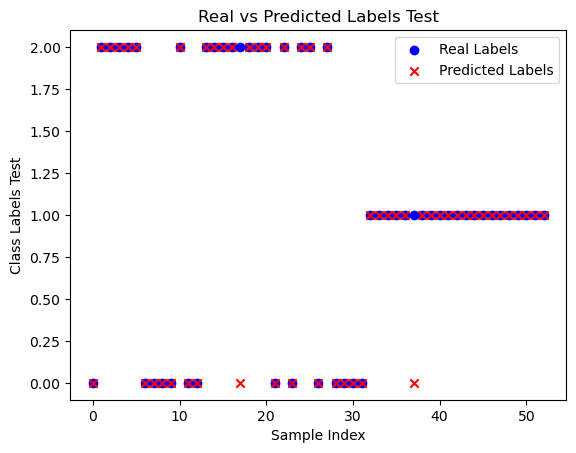

In [107]:
for t in range(epoch):
    error = np.zeros((num_train,3))
    r     = np.zeros((num_train,3))

    for i in range(num_train):
        input_data = input_train[i, :]              # 1*22    W1 = 100*22, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = (1 - np.exp(-net1))  / (1 + np.exp(-net1))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = (1 - np.exp(-net2)) / (1 + np.exp(-net2))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 2 * 1
        o3 = (1 - np.exp(-net3)) / (1 + np.exp(-net3))
        net4 = np.dot(w4,o3) + bi4
        o4 = softmax(net4)                    # 1 * 1
        target = output_train[i, :]
        error[i] = -target*np.log(o4)
        r[i] = (k1+k2)*error[i] -k2*error[i-1]
        
        t1  = 2*np.exp(-net1)/(1+np.exp(-net1))**2
        A = np.diag(t1)

        t2 = 2*np.exp(-net2)/(1+np.exp(-net2))**2
        B = np.diag(t2)
        t3 = 2*np.exp(-net3)/(1+np.exp(-net3))**2
        C = np.diag(t3)
        
        #Back prppagetion
        w4  -= eta * (-1*np.outer((target-o4), o3) + 2*landa4 * w4)
        bi4 -= eta * -1*(target - o4)

        w3  -= (eta * -1*(k1+k2)*np.outer(np.dot(np.dot((target - o4), w4), C), o2) + eta*2*landa3 * w3)
        bi3 -= eta *-1*(k1+k2)*np.dot(np.dot((target - o4), w4), C).reshape(n3)

        w2  -= (eta * -1*(k1+k2)*np.outer(np.dot(np.dot(np.dot((target - o4), w4), np.dot(C, w3)), B), o1) +  eta*2*landa2*w2)
        bi2 -= eta * -1*(k1+k2)*np.dot(np.dot(np.dot((target - o4), w4), np.dot(C, w3)), B).reshape(n2)

        w1  -= (eta * -1*(k1+k2)*np.outer(np.dot(np.dot(np.dot(np.dot((target - o4), w4), np.dot(C, w3)), np.dot(B, w2)), A), input_data) +  eta*2*landa1*w1)
        bi1 -= eta * -1*(k1+k2)*np.dot(np.dot(np.dot(np.dot((target - o4), w4), np.dot(C, w3)), np.dot(B, w2)), A).reshape(n1)

    error_square_train = np.zeros((num_train,n4))
    output_data_train = np.zeros((num_train,n4))
    for i in range(num_train):
        input_data = input_train[i, :]
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = (1 - np.exp(-net1))  / (1 + np.exp(-net1))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = (1 - np.exp(-net2)) / (1 + np.exp(-net2))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 2 * 1
        o3 = (1 - np.exp(-net3)) / (1 + np.exp(-net3))
        net4 = np.dot(w4,o3) + bi4
        o4 = softmax(net4) 
        target = output_train[i, :]
        output_data_train[i, :] = o4
        error[i] = -target*np.log(o4)
        r[i] = (k1+k2)*error[i] -k2*error[i-1]

    mse_train[t] = np.mean(r)

    error_square_test = np.zeros((num_test,n4))
    output_data_test = np.zeros((num_test, n4))
    for i in range(num_test):
        input_data = input_test[ i, :]
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = (1 - np.exp(-net1))  / (1 + np.exp(-net1))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = (1 - np.exp(-net2)) / (1 + np.exp(-net2))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 2 * 1
        o3 = (1 - np.exp(-net3)) / (1 + np.exp(-net3))
        net4 = np.dot(w4,o3) + bi4
        o4 = softmax(net4) 
        target = output_test[i, :]
        output_data_test[i, :] = o4
        error[i] = -target*np.log(o4)
        r[i] = (k1+k2)*error[i] -k2*error[i-1]

    mse_test[t] = np.mean(r)

plt.subplot(1, 2, 1)
plt.cla()
plt.semilogy(mse_train)
plt.title('MSE Train')
plt.xlabel('Epoch')
plt.ylabel('mse train')


# MSE test data plot
plt.subplot(1, 2, 2)
plt.cla()
plt.semilogy(mse_test)
plt.title('MSE Test')
plt.xlabel('Epoch')
plt.ylabel('mse test')
#plot confusion matrix for train data
actual =np.argmax(output_train, 1)
predicted = np.argmax(output_data_train, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2, 3])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[1, 2, 3])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Train")
plt.title("Real vs Predicted Labels Train")
plt.legend()
plt.show()

#plot confusion matrix for test data
actual =np.argmax(output_test, 1)
predicted = np.argmax(output_data_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2, 3])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[1, 2, 3])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Test")
plt.title("Real vs Predicted Labels Test")
plt.legend()
plt.show()

**initialize flexible and Emotional MLP**

In [108]:
n0, n1, n2, n3, n4 = input.shape[1], 80, 30, 10, 3
eta = 0.0001
epoch = 300

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1
k1, k2 = 0.6, 0.4


#layer 1 information
np.random.seed(42)
w1 = np.random.randn(n1, n0)
bi1 = np.random.randn(n1)
alpha1 = np.random.randn(n1)
net1 = np.zeros(n1)
o1 = np.zeros(n1)


#layer 2 information
w2 = np.random.randn(n2, n1)
bi2 = np.random.randn(n2)
alpha2 = np.random.randn(n2)
net2 = np.zeros(n2)
o2 = np.zeros(n2)

#layer 3 information
w3 = np.random.randn(n3, n2)
bi3 = np.random.randn(n3)
alpha3 = np.random.randn(n3)
net3 = np.zeros(n3)
o3 = np.zeros(n3)

#layer 4 information
w4 = np.random.randn(n4, n3)
bi4 = np.random.randn(n4)
net4 = np.zeros(n4)
o4 = np.zeros(n4)

landa1 = 0.0005
landa2 = 0.0005
landa3 = 0.00025
landa4 = 0.00025

**implemention Emotional and flexible MLP**

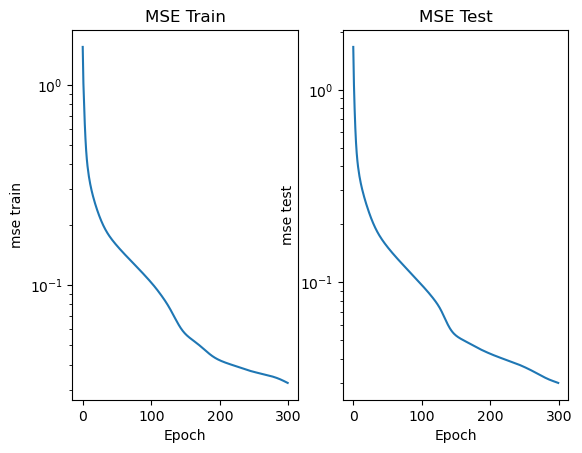

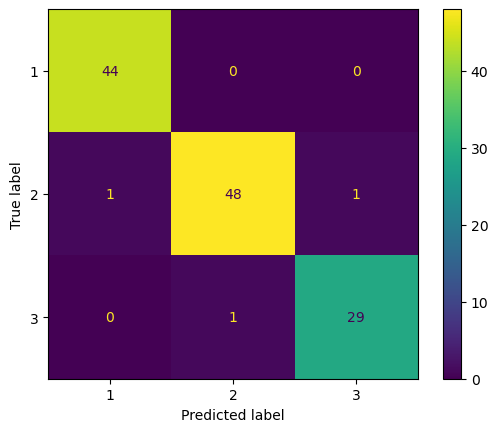

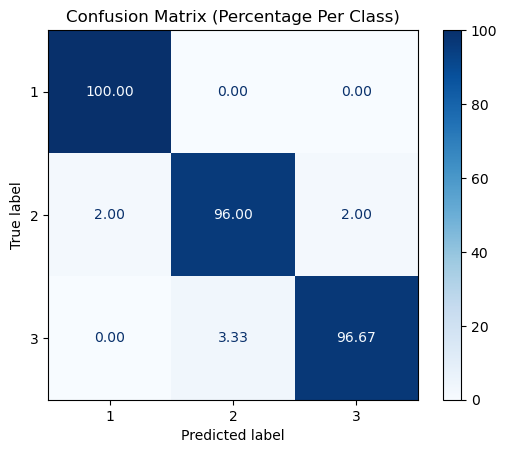

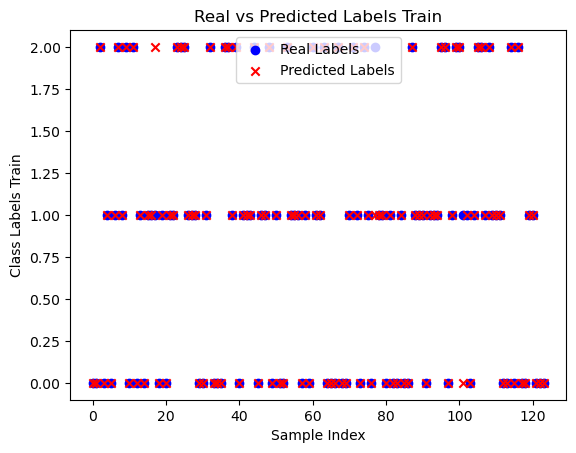

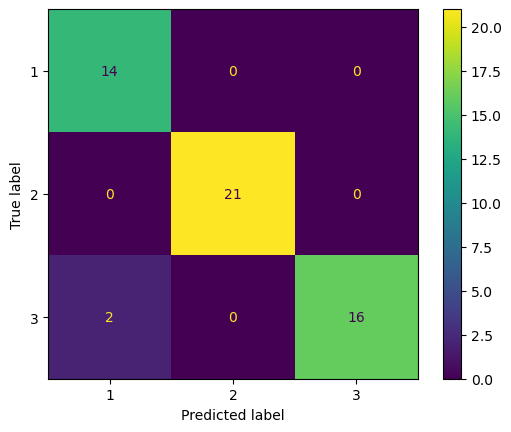

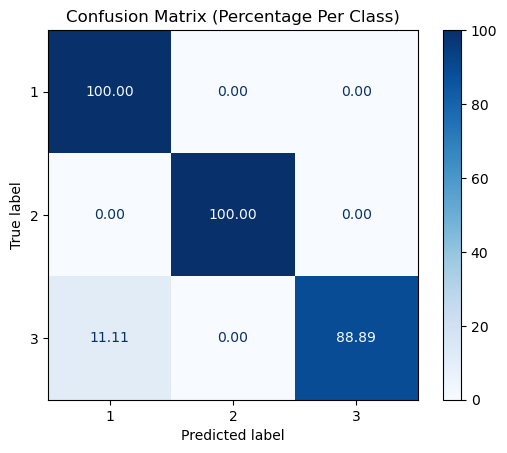

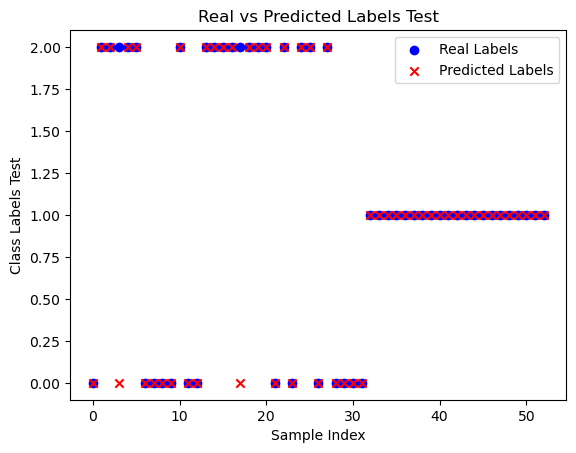

In [111]:
for t in range(epoch):
    error = np.zeros((num_train,3))
    r     = np.zeros((num_train,3))

    for i in range(num_train):
        input_data = input_train[i, :]              # 1*22    W1 = 100*22, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = (1 - np.exp(-net1*alpha1))  / (alpha1*(1 + np.exp(-net1*alpha1)))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = (1 - np.exp(-net2*alpha2))  / (alpha2*(1 + np.exp(-net2*alpha2)))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 2 * 1
        o3 = (1 - np.exp(-net3*alpha3))  / (alpha3*(1 + np.exp(-net3*alpha3)))
        net4 = np.dot(w4,o3) + bi4
        o4 = softmax(net4)                    # 1 * 1
        target = output_train[i, :]
        error[i] = -target*np.log(o4)
        r[i] = (k1+k2)*error[i] -k2*error[i-1]
        t1  = 2*np.exp(-net1*alpha1)/(1+np.exp(-net1*alpha1))**2
        A = np.diag(t1)

        t2 = 2*np.exp(-net2*alpha2)/((1+np.exp(-net2*alpha2))**2)
        B = np.diag(t2)

        t3 = 2*np.exp(-net3*alpha3)/((1+np.exp(-net3*alpha3))**2)
        C = np.diag(t3)

        t4 = ((2*alpha1*net1+np.exp(-alpha1*net1))*np.exp(-alpha1*net1)-1)/(alpha1*(1+np.exp(-alpha1*net1)))**2  
        D = np.diag(t4)
      
        t5 = ((2*alpha2*net2+np.exp(-alpha2*net2))*np.exp(-alpha2*net2)-1)/(alpha2*(1+np.exp(-alpha2*net2)))**2  
        E = np.diag(t5)

        t6 = ((2*alpha3*net3+np.exp(-alpha3*net3))*np.exp(-alpha3*net3)-1)/(alpha3*(1+np.exp(-alpha3*net3)))**2  
        F = np.diag(t6)
        
        #Back prppagetion
        w4  -= eta * (-1*(k1+k2)**np.outer((target-o4), o3) + 2*landa4 * w4)
        bi4 -= eta * -1*(target - o4)

        w3  -= (eta * -1*(k1+k2)**np.outer(np.dot(np.dot((target - o4), w4), C), o2) + eta*2*landa3 * w3)
        bi3 -= eta *-1 *(k1+k2)*np.dot(np.dot((target - o4), w4), C).reshape(n3)
        alpha3 -=eta*-1*(k1+k2)*np.dot(np.dot((target -o4), w4), F)

        w2  -= (eta * -1*(k1+k2)*np.outer(np.dot(np.dot(np.dot((target - o4), w4), np.dot(C, w3)), B), o1) +  eta*2*landa2*w2)
        bi2 -= eta * -1*(k1+k2)*np.dot(np.dot(np.dot((target - o4), w4), np.dot(C, w3)), B).reshape(n2)
        alpha2 -= eta * -1*(k1+k2)*np.dot(np.dot(np.dot((target - o4), w4), np.dot(C, w3)), B)

        w1  -= (eta * -1*(k1+k2)*np.outer(np.dot(np.dot(np.dot(np.dot((target - o4), w4), np.dot(C, w3)), np.dot(B, w2)), A), input_data) +  eta*2*landa1*w1)
        bi1 -= eta * -1*(k1+k2)*np.dot(np.dot(np.dot(np.dot((target - o4), w4), np.dot(C, w3)), np.dot(B, w2)), A).reshape(n1)
        alpha1 -= eta*-1*(k1+k2)*np.dot(np.dot(np.dot((target - o4), w4), np.dot(C, w3)),np.dot(B, np.dot(w2, D))).reshape(n1)

    error_square_train = np.zeros((num_train,n4))
    output_data_train = np.zeros((num_train,n4))
    for i in range(num_train):
        input_data = input_train[i, :]
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = (1 - np.exp(-net1*alpha1))  / (alpha1*(1 + np.exp(-net1*alpha1)))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = (1 - np.exp(-net2*alpha2))  / (alpha2*(1 + np.exp(-net2*alpha2)))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 2 * 1
        o3 = (1 - np.exp(-net3*alpha3))  / (alpha3*(1 + np.exp(-net3*alpha3)))
        net4 = np.dot(w4,o3) + bi4
        o4 = softmax(net4)     
        target = output_train[i, :]
        output_data_train[i, :] = o4
        error[i] = -target*np.log(o4)
        r[i] = (k1+k2)*error[i] -k2*error[i-1]

    mse_train[t] = np.mean(r)

    error_square_test = np.zeros((num_test,n4))
    output_data_test = np.zeros((num_test, n4))
    for i in range(num_test):
        input_data = input_test[ i, :]
        net1 = np.dot(w1, input_data.T) + bi1                                          # 100 * 1
        o1 = (1 - np.exp(-net1*alpha1))  / (alpha1*(1 + np.exp(-net1*alpha1)))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2                                                     # 20 * 1
        o2 = (1 - np.exp(-net2*alpha2))  / (alpha2*(1 + np.exp(-net2*alpha2)))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3                                                      # 2 * 1
        o3 = (1 - np.exp(-net3*alpha3))  / (alpha3*(1 + np.exp(-net3*alpha3)))
        net4 = np.dot(w4,o3) + bi4
        o4 = softmax(net4)    
        target = output_test[i, :]
        output_data_test[i, :] = o4
        error[i] = -target*np.log(o4)
        r[i] = (k1+k2)*error[i] -k2*error[i-1]
    mse_test[t] = np.mean(r)

plt.subplot(1, 2, 1)
plt.cla()
plt.semilogy(mse_train)
plt.title('MSE Train')
plt.xlabel('Epoch')
plt.ylabel('mse train')


# MSE test data plot
plt.subplot(1, 2, 2)
plt.cla()
plt.semilogy(mse_test)
plt.title('MSE Test')
plt.xlabel('Epoch')
plt.ylabel('mse test')
#plot confusion matrix for train data

actual =np.argmax(output_train, 1)
predicted = np.argmax(output_data_train, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2, 3])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[1, 2, 3])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Train")
plt.title("Real vs Predicted Labels Train")
plt.legend()
plt.show()

#plot confusion matrix for test data
actual =np.argmax(output_test, 1)
predicted = np.argmax(output_data_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2, 3])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[1, 2, 3])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Test")
plt.title("Real vs Predicted Labels Test")
plt.legend()
plt.show()

**initialize flexible, Emotional and adaptive MLP**

In [30]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n0, n1, n2, n3, n4 =input.shape[1], 40, 20, 10, 3

landa = 0.00001
epoch = 1200

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = 0, 0.001
k1, k2 = 0.6, 0.4


#layer 1 information
np.random.seed(42)
w1p = w1 = np.random.randn(n1, n0)
etaw1 = np.random.uniform(a,b,(n1,n0))
bi1 = np.random.randn(n1)
etabi1  =np.random.uniform(a,b,n1)
alpha1 = np.random.randn(n1)
etaa1 = np.random.uniform(a,b,n1)
net1 = np.zeros(n1)
o1p = o1 = np.zeros(n1)


#layer 2 information
w2p = w2 = np.random.randn(n2, n1)
etaw2 = np.random.uniform(a,b,(n2,n1))
bi2 = np.random.randn(n2)
etabi2 = np.random.uniform(a,b, n2)
alpha2 = np.random.randn(n2)
etaa2 = np.random.uniform(a,b,n2)
net2 = np.zeros(n2)
o2p = o2 = np.zeros(n2)

#layer 3 information
w3p =w3 = np.random.randn(n3, n2)
etaw3 = np.random.uniform(a,b, (n3,n2))
bi3 = np.random.randn(n3)
etabi3 = np.random.uniform(a,b, n3)
alpha3 = np.random.randn(n3)
etaa3 = np.random.uniform(a,b,n3)
net3 = np.zeros(n3)
o3=o3p = np.zeros(n3)

#layer 4 information
w4=w4p = np.random.randn(n4, n3)
etaw4 = np.random.uniform(a,b,(n4,n3))
bi4 = np.random.randn(n4)
etabi4 = np.random.uniform(a,b, n4)
net4 = np.zeros(n4)
o4p = o4 = np.zeros(n4)

landa1 = 0.0005
landa2 = 0.0005
landa3 = 0.00025
landa4 = 0.00025

Fp = F =np.diag(np.ones(n3))
Cp = C =np.diag(np.ones(n3))
Bp = B =np.diag(np.ones(n2))
Ep = E = np.diag(np.ones(n2))
Ap = A = np.diag(np.ones(n1))
Dp = D = np.diag(np.ones(n1))

def softmax(a):
  e = np.exp(a)
  return e/e.sum()

**implemention flexible, Emotional and adaptive MLP**

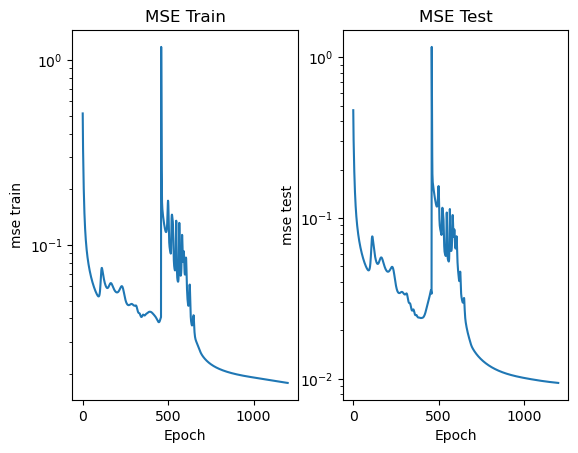

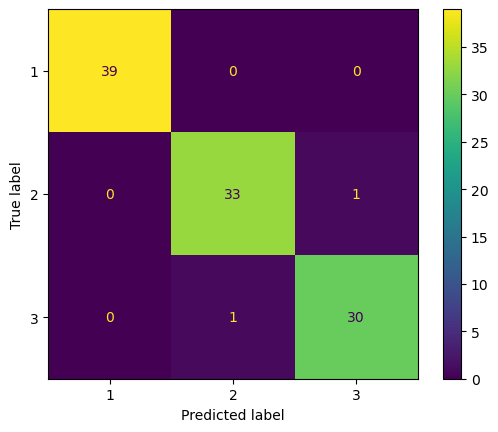

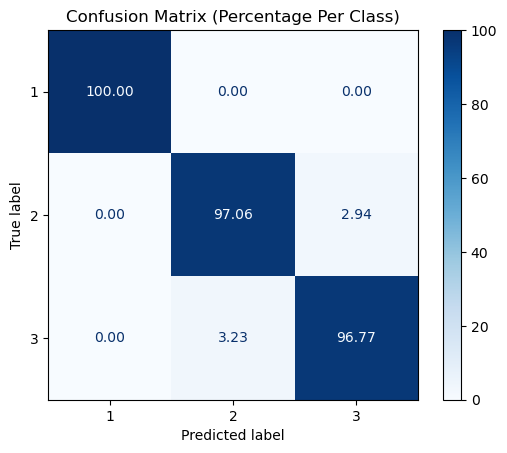

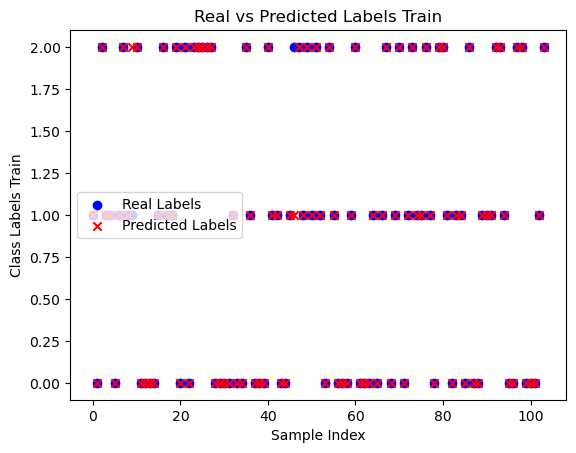

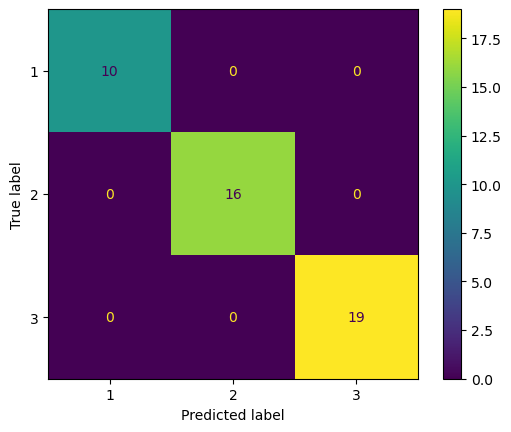

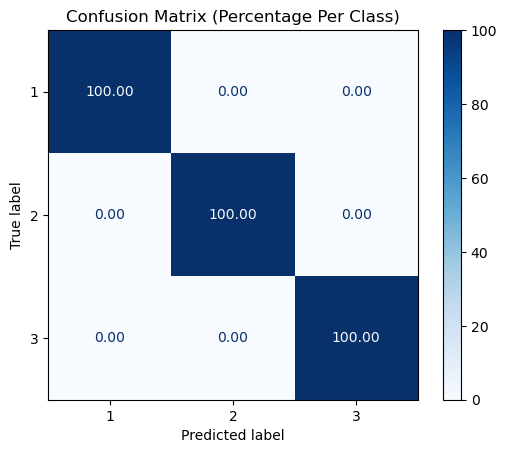

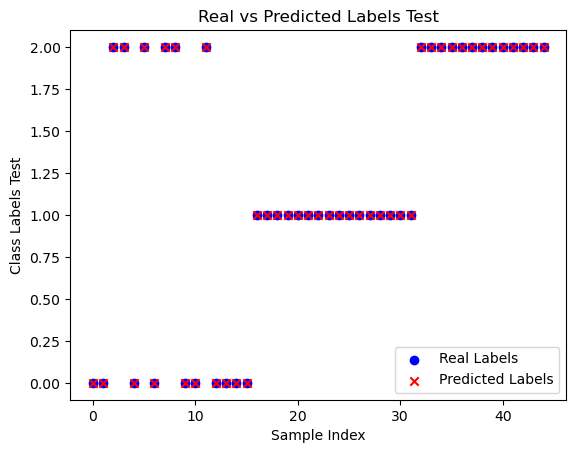

In [33]:
for t in range(epoch):
    error = np.zeros((num_train,3))
    r = np.zeros((num_train,3))
    for i in range(num_train):
        #Feed Forward
        input_data = input_train[i, :]                               # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1                   # 100 * 1
        o1 = (1 - np.exp(-net1*alpha1)) / (alpha1*(1 + np.exp(-net1*alpha1)))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2                             # 20 * 1
        o2 = (1 - np.exp(-net2*alpha2)) / (alpha2*(1 + np.exp(-net2*alpha2)))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3                             # 1 * 1
        o3 = (1 - np.exp(-net3*alpha3))/(alpha3*(1 + np.exp(-net3*alpha3)))            # 1 * 1
        net4 = np.dot(w4, o3) + bi4
        o4 = softmax(net4)
        target = output_train[i, :]
        error[i] = -target*np.log(o4)
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
        
        # f prim 
        t1  = 2*np.exp(-net1*alpha1)/(1+np.exp(-net1*alpha1))**2
        A = np.diag(t1)
        t2 = 2*np.exp(-net2*alpha2)/((1+np.exp(-net2*alpha2))**2)
        B = np.diag(t2)
        t3 = 2*np.exp(-net3*alpha3)/((1+np.exp(-net3*alpha3))**2)
        C = np.diag(t3)
        
        #fstar
        t4 = ((2*alpha1*net1+np.exp(-alpha1*net1))*np.exp(-alpha1*net1)-1)/(alpha1*(1+np.exp(-alpha1*net1)))**2  
        D = np.diag(t4)
        t5 = ((2*alpha2*net2+np.exp(-alpha2*net2))*np.exp(-alpha2*net2)-1)/(alpha2*(1+np.exp(-alpha2*net2)))**2  
        E = np.diag(t5)
        t6 = ((2*alpha3*net3+np.exp(-alpha3*net3))*np.exp(-alpha3*net3)-1)/(alpha3*(1+np.exp(-alpha3*net3)))**2  
        F = np.diag(t6)
        
        #Back prppagetion
        #layer4
        gradw4 = np.outer((output_train[i, :]-o4),o3)
        gradw4p = np.outer((output_train[i-1, :]-o4p),o3p)
        
        etaw4 -= landa*(gradw4*-1*(gradw4p+2*landa4*w4p))
        w4    -= -1*etaw4 * (gradw4+2*landa4*w4)
        
        etabi4 -=landa*(output_train[i, :]-o4)*-1*(output_train[i-1, :]-o4p)
        bi4   -= -1*etabi4 *(output_train[i, :]-o4)
    
        #layer3
        gradw3 = np.outer(np.dot(np.dot((output_train[i, :]-o4),w4),C),o2)
        gradw3p = np.outer(np.dot(np.dot((output_train[i-1, :]-o4p),w4p),Cp),o2p)
        
        etaw3  -= landa*gradw3*-1*(gradw3p+etaw3*2*landa3*w3p)
        w3     -= -1*(etaw3*gradw3 + etaw3*2*landa3*w3)
        
        gradbi3 = np.dot(np.dot((output_train[i, :]-o4),w4),C)
        gradbi3p = np.dot(np.dot((output_train[i-1, :]-o4p),w4p),Cp)
        
        etabi3 -=(landa* gradbi3*-1*gradbi3p).reshape(n3)
        bi3    -= -1*etabi3*gradbi3.reshape(n3)
        
        gradalpha3 = np.dot(np.dot((output_train[i, :]-o4),w4), F)
        gradalpha3p = np.dot(np.dot((output_train[i-1, :]-o4p),w4p),Fp)
        
        etaa3  -=(landa*gradalpha3*-1* gradalpha3p).reshape(n3)
        alpha3 -= -1*etaa3*gradalpha3.reshape(n3)
        
        #layer2
        gradw2 = np.outer(np.dot(np.dot((output_train[i, :]-o4),w4),np.dot(np.dot(C,w3),B)),o1)
        gradw2p = np.outer(np.dot(np.dot((output_train[i-1, :]-o4p),w4p),np.dot(np.dot(Cp,w3p),Bp)),o1p)
        
        etaw2  -=landa*gradw2*-1*(gradw2p+2*landa2*w2p)
        w2     -= -1*(etaw2*gradw2+ etaw2*2*landa2*w2)

        gradbi2 = np.dot(np.dot((output_train[i, :]-o4),w4),np.dot(np.dot(C,w3),B))
        gradbi2p = np.dot(np.dot((output_train[i-1, :]-o4p),w4p),np.dot(np.dot(Cp,w3p),Bp))
        
        etabi2  -=(landa*gradbi2*-1*gradbi2p).reshape(n2)
        bi2    -= -1*etabi2*gradbi2.reshape(n2)
        
        gradalpha2 = np.dot(np.dot(np.dot(np.dot((output_train[i, :]-o4),w4),C),w3),E)
        gradalpha2p = np.dot(np.dot(np.dot(np.dot((output_train[i-1, :]-o4p),w4p),Cp),w3p),Ep)
        
        etaa2 -= (landa* gradalpha2*-1* gradalpha2p).reshape(n2)
        alpha2 -= -1*etaa2* gradalpha2.reshape(n2) 
        
        #layer1
        gradw1 = np.outer(np.dot(np.dot(np.dot(np.dot(np.dot(np.dot((output_train[i,:]-o4),w4),C),w3),B),w2),A),input_train[i,:])
        gradw1p =np.outer(np.dot(np.dot(np.dot(np.dot(np.dot(np.dot((output_train[i-1,:]-o4p),w4p),Cp),w3p),Bp),w2p),Ap),input_train[i-1,:])
        
        etaw1  -=landa*gradw1*-1*(gradw1p+2*landa1*w1p)
        w1     -= -1*(etaw1*gradw1+ etaw1*2*landa1*w1)

        gradbi1 = np.dot(np.dot(np.dot(np.dot(np.dot(np.dot((output_train[i,:]-o4),w4),C),w3),B),w2),A)
        gradbi1p = np.dot(np.dot(np.dot(np.dot(np.dot(np.dot((output_train[i-1,:]-o4p),w4p),Cp),w3p),Bp),w2p),Ap)
        
        etabi1 -=(landa*gradbi1*-1*gradbi1p).reshape(n1)
        bi1    -= -1*(etabi1*gradbi1).reshape(n1)

        gradalpha1 = np.dot(np.dot(np.dot(np.dot(np.dot(np.dot((output_train[i,:]-o4),w4),C),w3),B),w2),D)
        gradalpha1p = np.dot(np.dot(np.dot(np.dot(np.dot(np.dot((output_train[i-1,:]-o4p),w4p),Cp),w3p),Bp),w2p),Dp)
        
        etaa1  -=(landa*gradalpha1*-1*gradalpha1p).reshape(n1)
        alpha1 -= -1*etaa1*gradalpha1p.reshape(n1)

        w4p = w4
        o3p = o3
        o4p = o4
        w3p = w3
        o2p = o2
        Cp = C
        Fp = F
        w2p = w2
        Bp = B
        o1p = o1
        w2p = w2
        Ep = E
        w1p = w1
        Ap =A
        Dp = D

    error_square_train = np.zeros((num_train,3))
    output_data_train = np.zeros((num_train,3))
    for i in range(num_train):
        input_data = input_train[i, :]                                # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1                   # 100 * 1
        o1 = (1 - np.exp(-net1*alpha1)) / (alpha1*(1 + np.exp(-net1*alpha1)))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2                             # 20 * 1
        o2 = (1 - np.exp(-net2*alpha2)) / (alpha2*(1 + np.exp(-net2*alpha2)))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3                             # 1 * 1
        o3 = (1 - np.exp(-net3*alpha3))/(alpha3*(1 + np.exp(-net3*alpha3)))            # 1 * 1
        net4 = np.dot(w4, o3) + bi4
        o4 = softmax(net4)
        target = output_train[i, :]
        output_data_train[i, :] = o4
        error[i] = -target*np.log(o4)
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
       
    mse_train[t] = np.mean(error)

    error_square_test = np.zeros((num_test,3))
    output_data_test = np.zeros((num_test,3))
    for i in range(num_test):
        input_data = input_test[i, :]                                # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1                   # 100 * 1
        o1 = (1 - np.exp(-net1*alpha1)) / (alpha1*(1 + np.exp(-net1*alpha1)))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2                             # 20 * 1
        o2 = (1 - np.exp(-net2*alpha2)) / (alpha2*(1 + np.exp(-net2*alpha2)))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3                             # 1 * 1
        o3 = (1 - np.exp(-net3*alpha3))/(alpha3*(1 + np.exp(-net3*alpha3)))            # 1 * 1
        net4 = np.dot(w4, o3) + bi4
        o4 = softmax(net4)
        target = output_test[i, :]
        output_data_test[i, :] = o4
        error[i] = -target*np.log(o4) 
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
 
    mse_test[t] = np.mean(error)

plt.subplot(1, 2, 1)
plt.cla()
plt.semilogy(mse_train)
plt.title('MSE Train')
plt.xlabel('Epoch')
plt.ylabel('mse train')


# MSE test data plot
plt.subplot(1, 2, 2)
plt.cla()
plt.semilogy(mse_test)
plt.title('MSE Test')
plt.xlabel('Epoch')
plt.ylabel('mse test')

#plot confusion matrix for train data
actual =np.argmax(output_train, 1)
predicted = np.argmax(output_data_train, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2, 3])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[1, 2, 3])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Train")
plt.title("Real vs Predicted Labels Train")
plt.legend()
plt.show()

#plot confusion matrix for test data
actual =np.argmax(output_test, 1)
predicted = np.argmax(output_data_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2, 3])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[1, 2, 3])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Test")
plt.title("Real vs Predicted Labels Test")
plt.legend()
plt.show()
